# Mouse snRNA Annotation
## Left cerebral cortex

In [5]:
library(Matrix)
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(viridis))
library(RColorBrewer)
library(data.table)
options(future.globals.maxSize = 10000 * 1024^2)
future.seed=TRUE
source("plotting_functions.R")

In [6]:
system("mkdir ../../plots/")
system("mkdir ../../plots/qc")
system("mkdir ../../plots/clustering")
system("mkdir ../../plots/annotation")

In [7]:
tissue = "cortex"
abrv = "C"
synapse_id = "EAID_000085"
enc_abrv= "CNS"
markers_tissue = "Cortex/Hippocampus"

# Read in data

In [8]:
obj = readRDS(paste0("../../seurat/",tissue,"_Parse_10x_integrated.rds"))
obj$sample = factor(obj$sample, 
                    levels = paste0(abrv,"_",rep(c("4","10","14","25","36","2m","18m"),each=4),rep(c("_M","_F"),each=2),c("_1","_2")))
Idents(obj) = obj$seurat_clusters

In [9]:
obj

An object of class Seurat 
84008 features across 112118 samples within 3 assays 
Active assay: SCT (33301 features, 0 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [5]:
sample_cols = spectral_cols(obj@meta.data,"sample")
cluster_cols = set1_cols(obj@meta.data,"seurat_clusters")
depth2_cols = c("#01a0de","#d885ce","#7f1c72")
tech_cols = c("#01a0de","#7f1c72")
sex_cols = c("#f8b4c5","#2900ff")
annot_cols = read.csv("../../../../figures/data/enc4_mouse_snrna_celltypes.csv")
annot_cols = annot_cols[annot_cols$tissue == str_to_title(tissue),]

# QC plots

## Knee plot

### Violin plot of QC metrics split by single cell platform

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



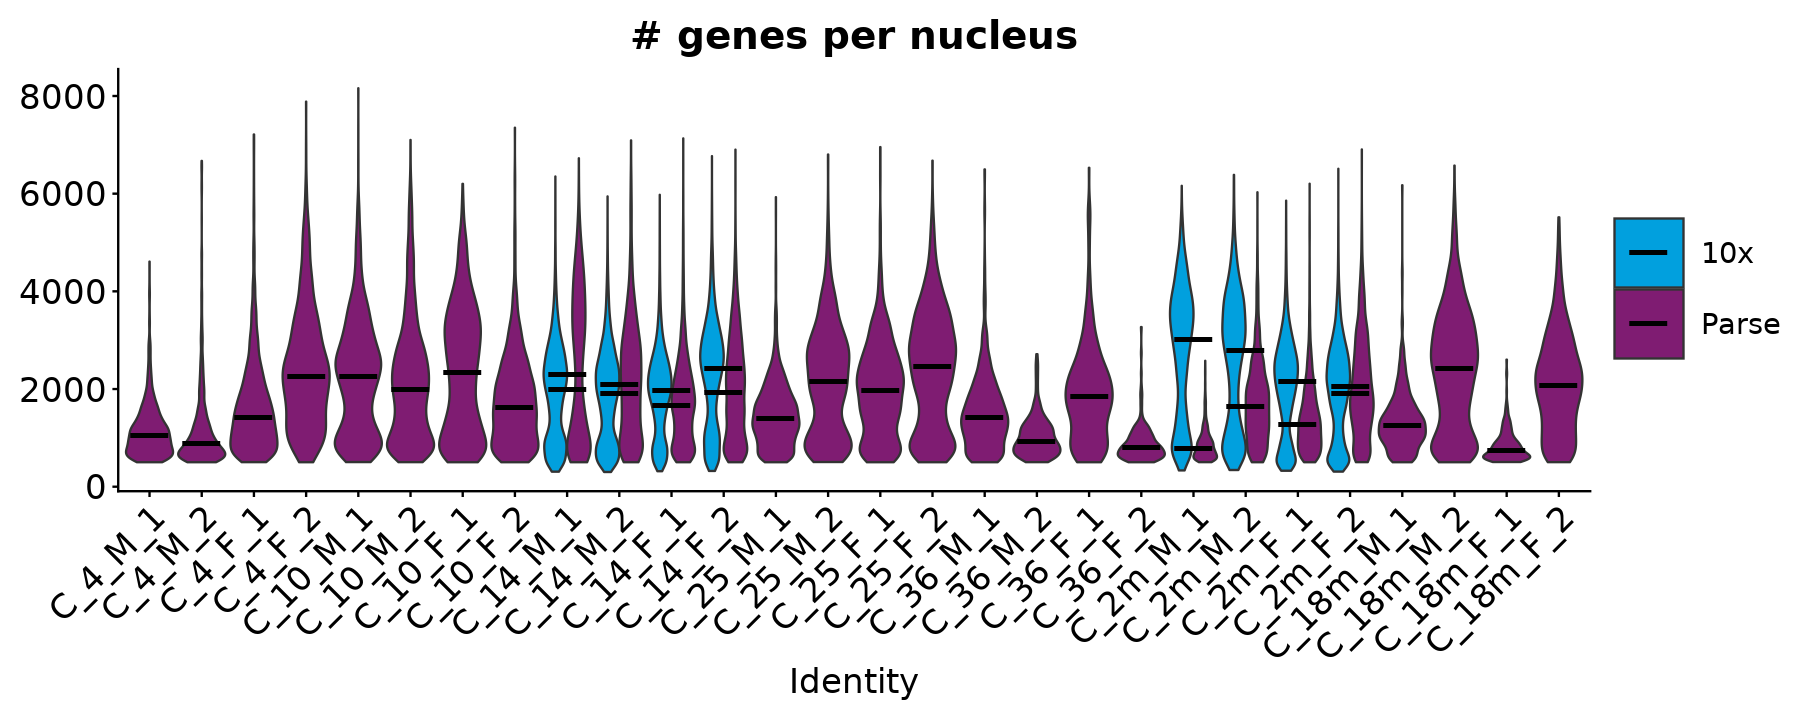

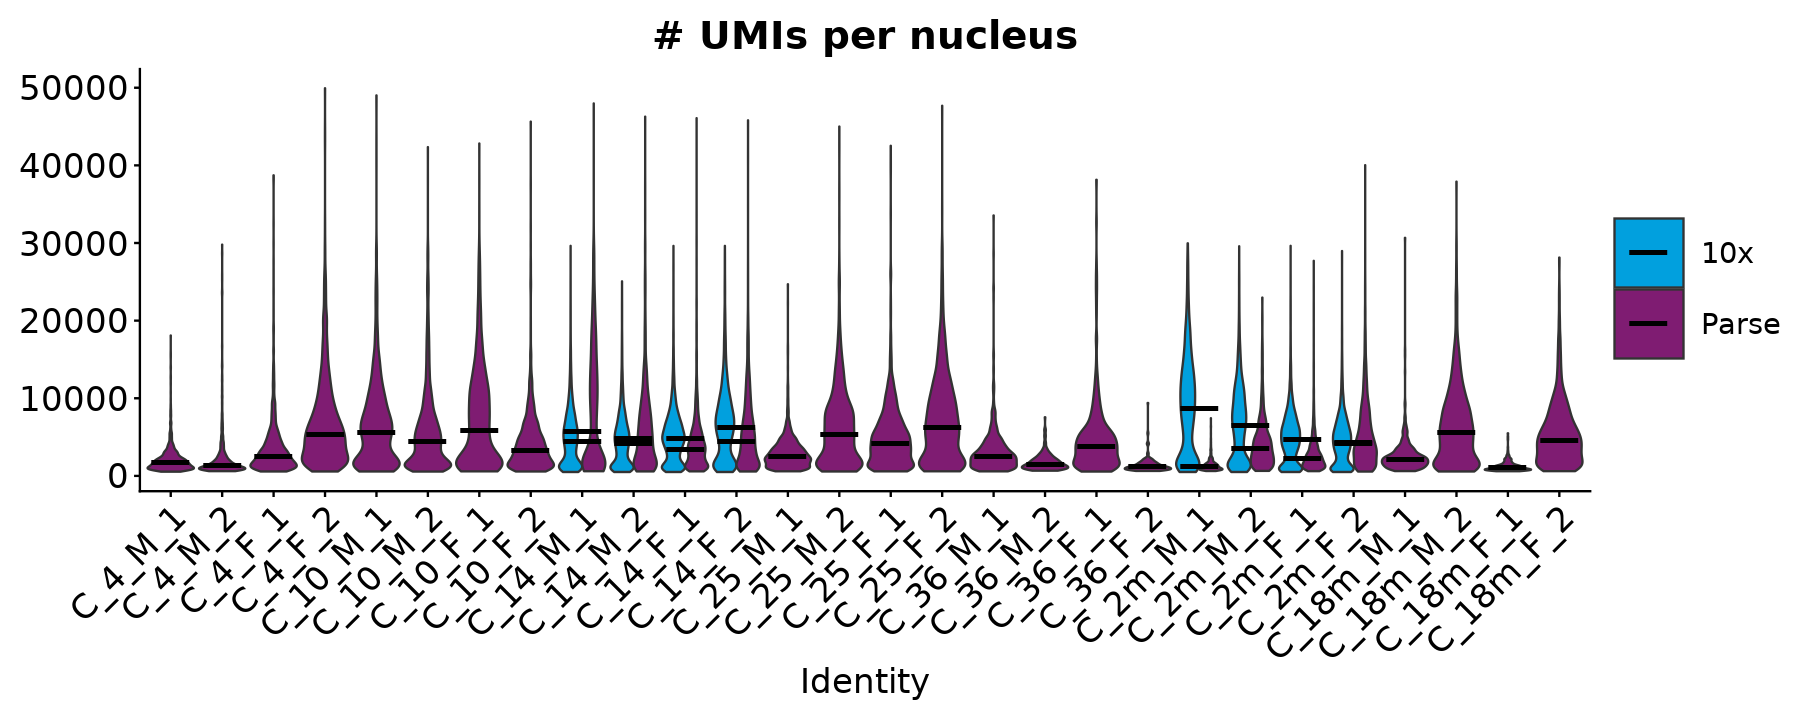

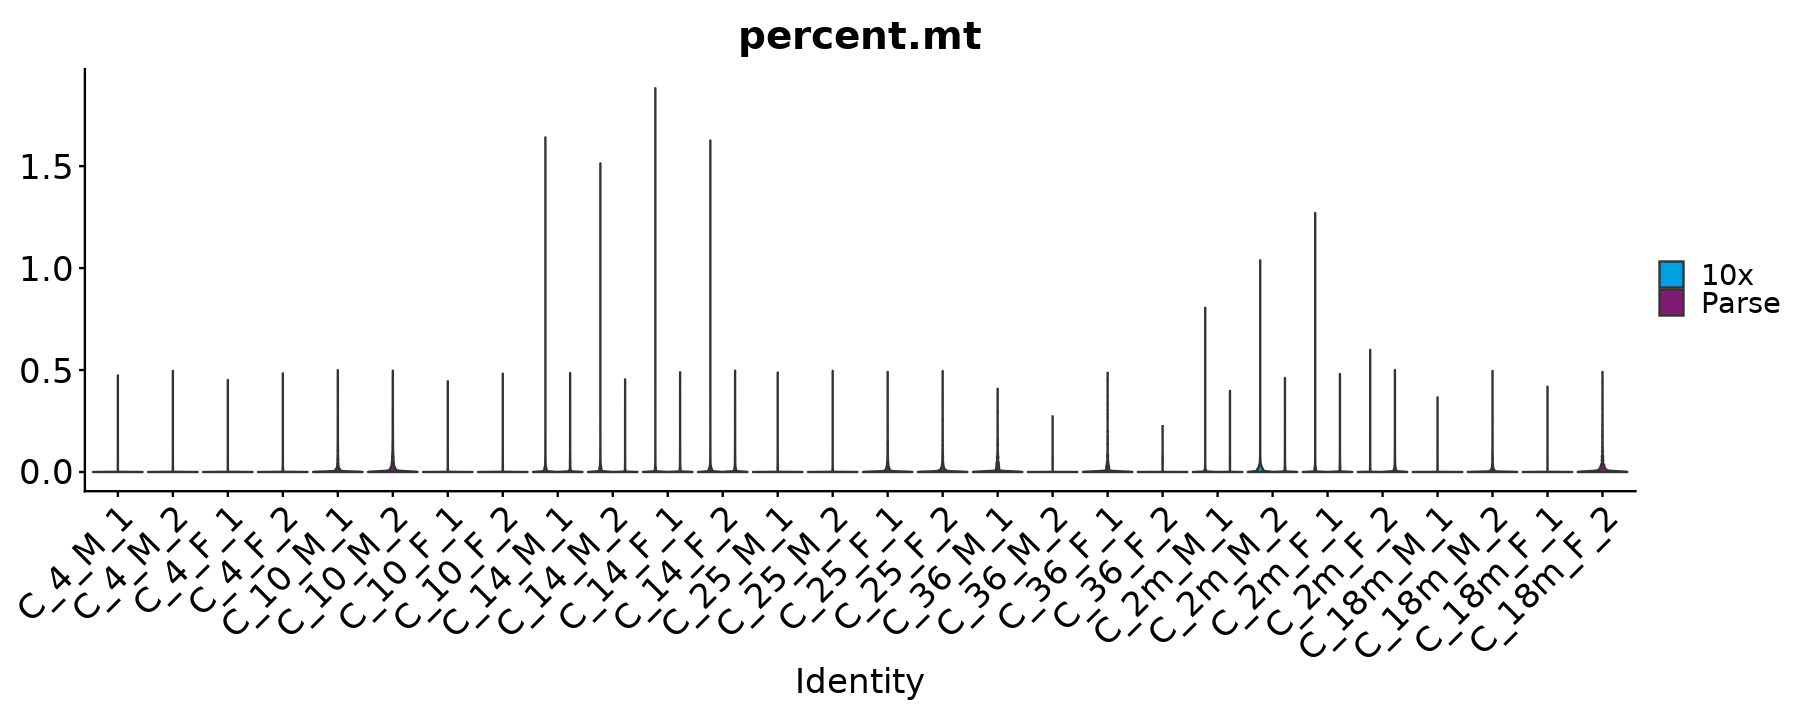

In [5]:
options(repr.plot.width = 15, repr.plot.height = 6)
p = VlnPlot(obj, features = c("nFeature_RNA"), ncol = 1, split.by = "technology",
        pt.size = 0, group.by = "sample")+ ggtitle("# genes per nucleus") +
        scale_fill_manual(values = tech_cols) +
        stat_summary(fun.y = median, geom='point', size = 15, colour = "black", shape = 95) + 
        theme(text = element_text(size = 20),
              axis.text.x = element_text(size = 20),
              axis.text.y = element_text(size = 20))

p1 = VlnPlot(obj, features = c("nCount_RNA"), ncol = 1, split.by = "technology",
        pt.size = 0, group.by = "sample") + ggtitle("# UMIs per nucleus") +
        scale_fill_manual(values = tech_cols) +
        stat_summary(fun.y = median, geom='point', size = 15, colour = "black", shape = 95) + 
        theme(text = element_text(size = 20), 
              axis.text.x = element_text(size = 20), 
              axis.text.y = element_text(size = 20))

p2 = VlnPlot(obj, features = c("percent.mt"), ncol = 1, split.by = "technology",
        pt.size = 0, group.by = "sample") + 
        scale_fill_manual(values = tech_cols) +
        theme(text = element_text(size = 20),
                axis.text.x = element_text(size = 20),
                axis.text.y = element_text(size = 20))
p
p1
p2

In [6]:
pdf(file="../../plots/qc/experiment_violinplots.pdf", width = 15, height = 6)
p
p1
p2
dev.off()

png 
  2

## UMAP "Feature Plots" of QC metadata

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already pres

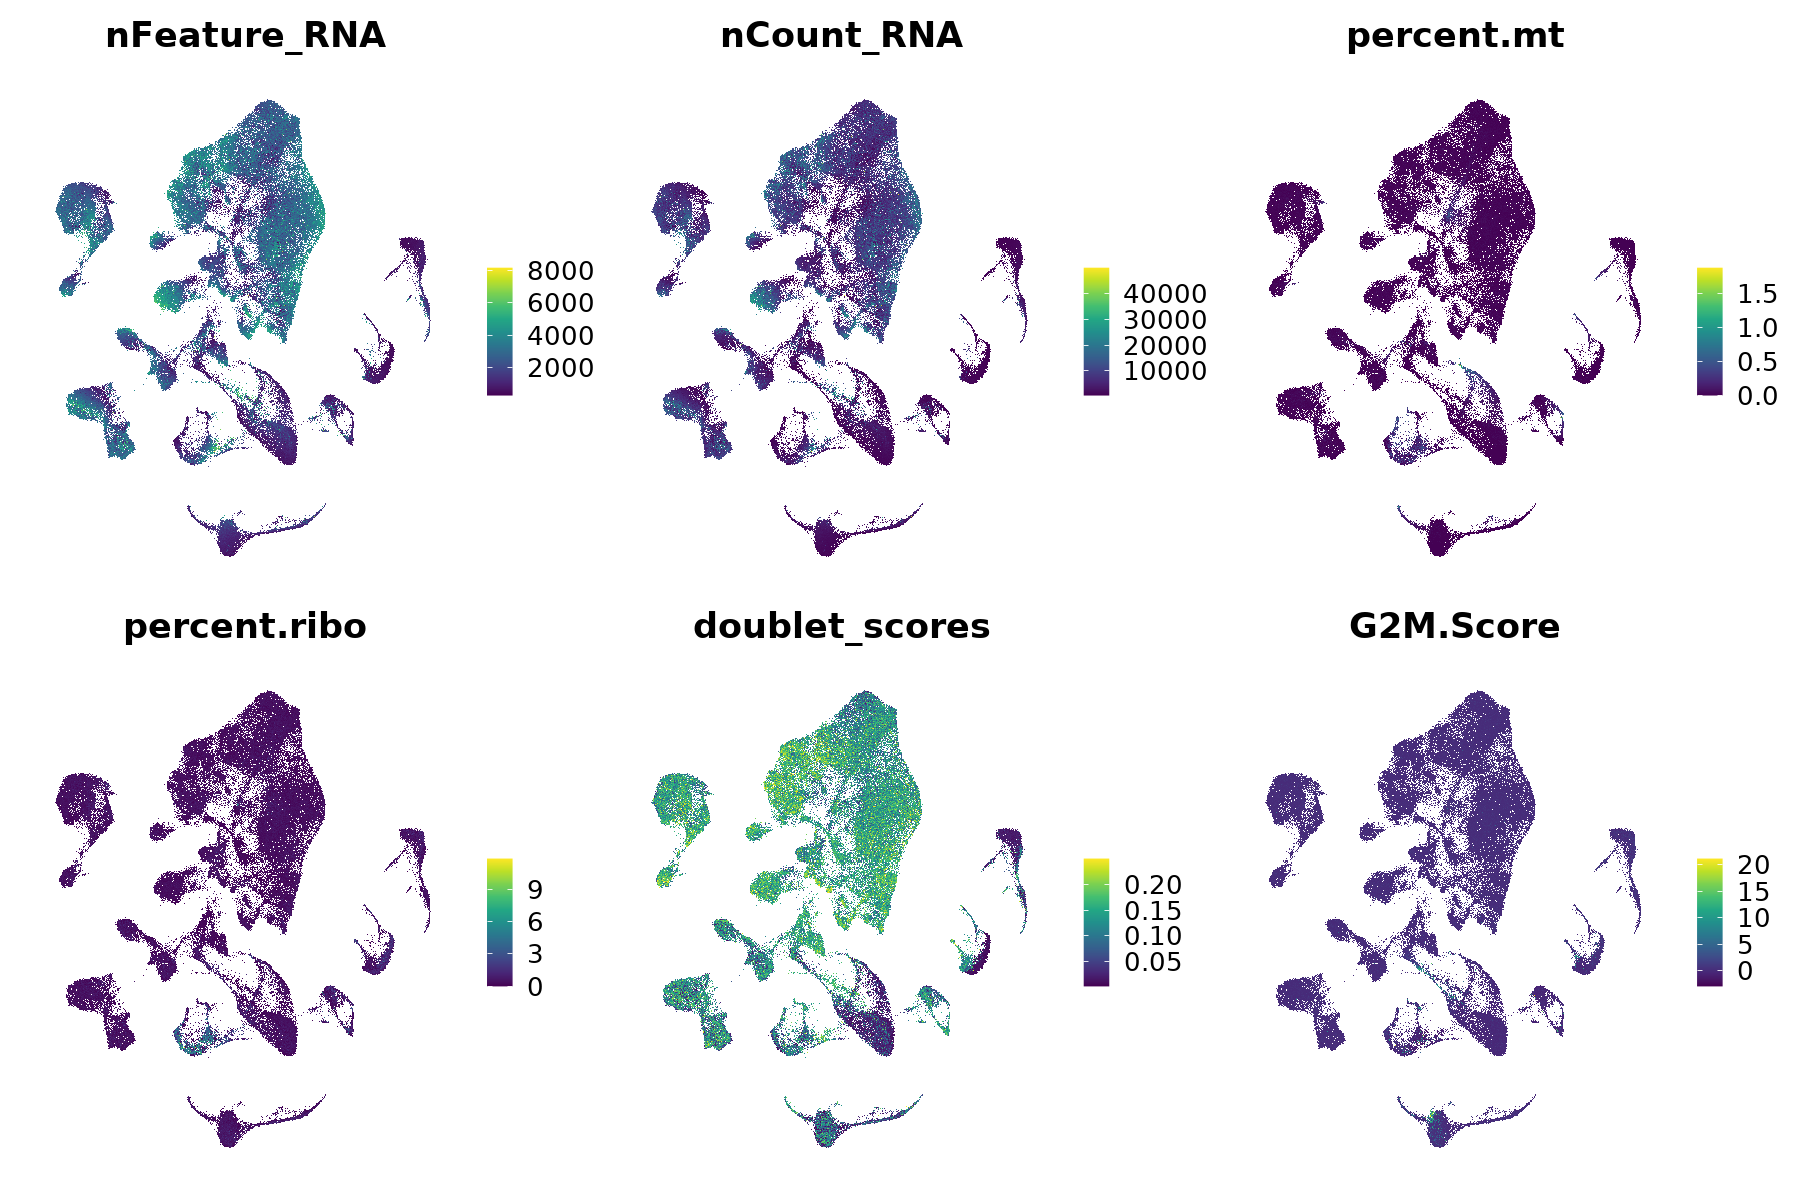

In [7]:
options(repr.plot.width = 15, repr.plot.height = 10)

featureplot(obj,c("nFeature_RNA",
                        "nCount_RNA",
                        "percent.mt",
                        "percent.ribo",
                        "doublet_scores",
                        "G2M.Score"))

In [8]:
pdf(file="../../plots/qc/qc_featureplot.png", width = 15, height = 10)
featureplot(obj,c("nFeature_RNA",
                        "nCount_RNA",
                        "percent.mt",
                        "percent.ribo",
                        "doublet_scores",
                        "G2M.Score"))
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already pres

png 
  2

# Check integration and clustering

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



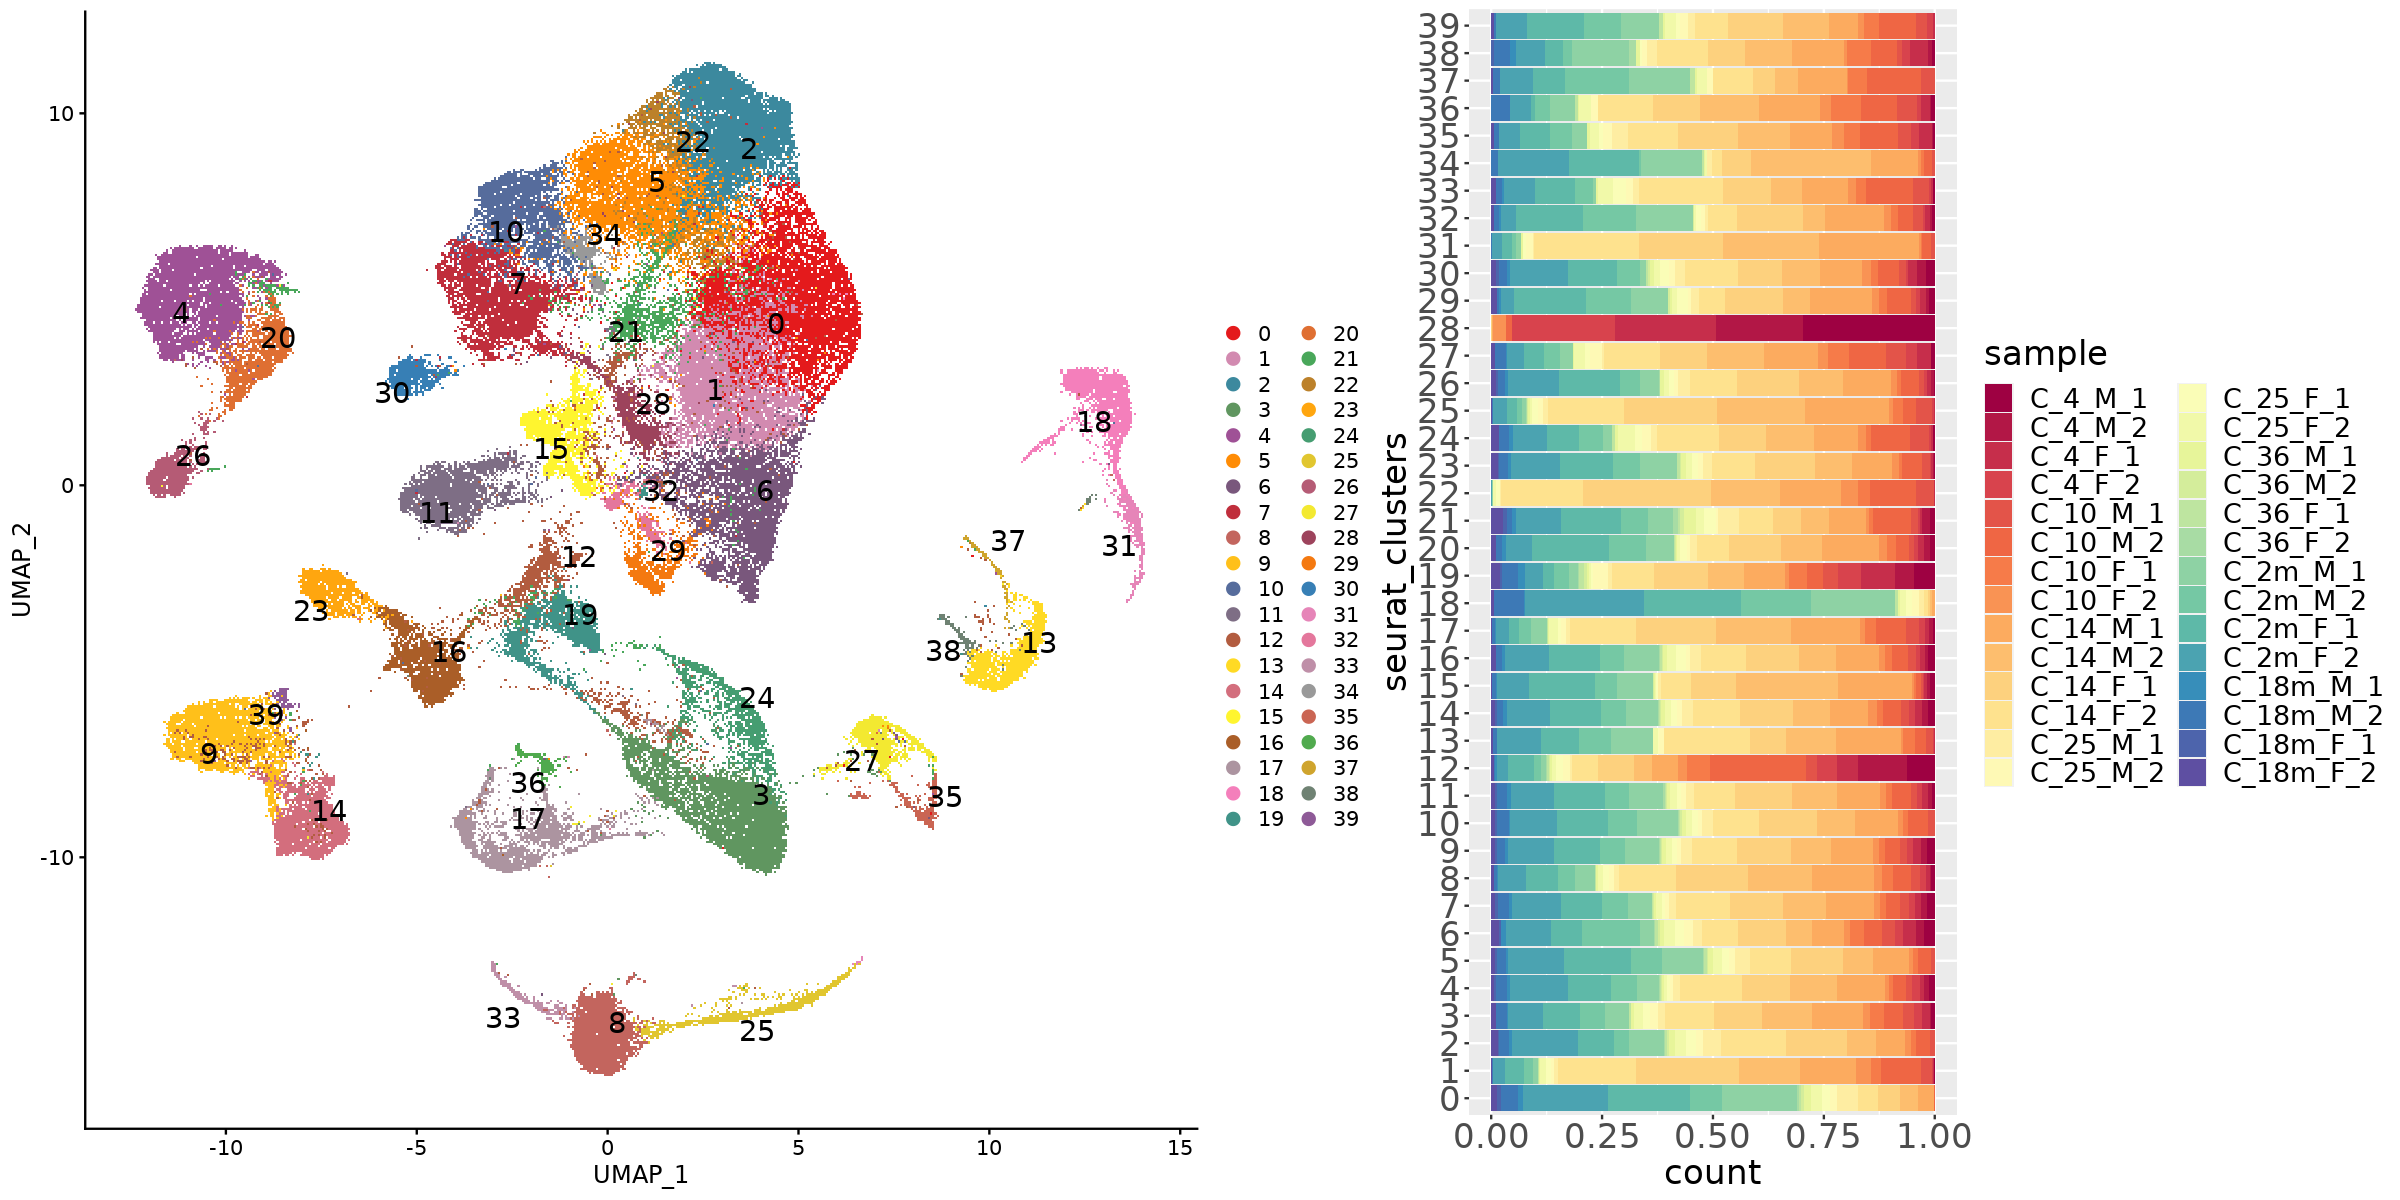

In [9]:
options(repr.plot.width = 20, repr.plot.height = 10)

p1=DimPlot(obj, reduction = "umap", label = TRUE, label.size=6,repel = TRUE, cols = cluster_cols)

p2=ggplot(obj@meta.data, aes(x=seurat_clusters, fill=sample)) + geom_bar(position = "fill") +
theme(text = element_text(size = 20), axis.text.x = element_text(size = 20), 
      axis.text.y = element_text(size = 20)) + scale_fill_manual(values = sample_cols) & coord_flip()
gridExtra::grid.arrange(
  p1, p2,
  widths = c(2,1.5),
  layout_matrix = rbind(c(1, 2)))


In [10]:
pdf(file="../../plots/clustering/UMAP_cluster_sample_barplot.pdf",
    width = 20, height = 10)

gridExtra::grid.arrange(
  p1, p2,
  widths = c(2,1.5),
  layout_matrix = rbind(c(1, 2)))


dev.off()

png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



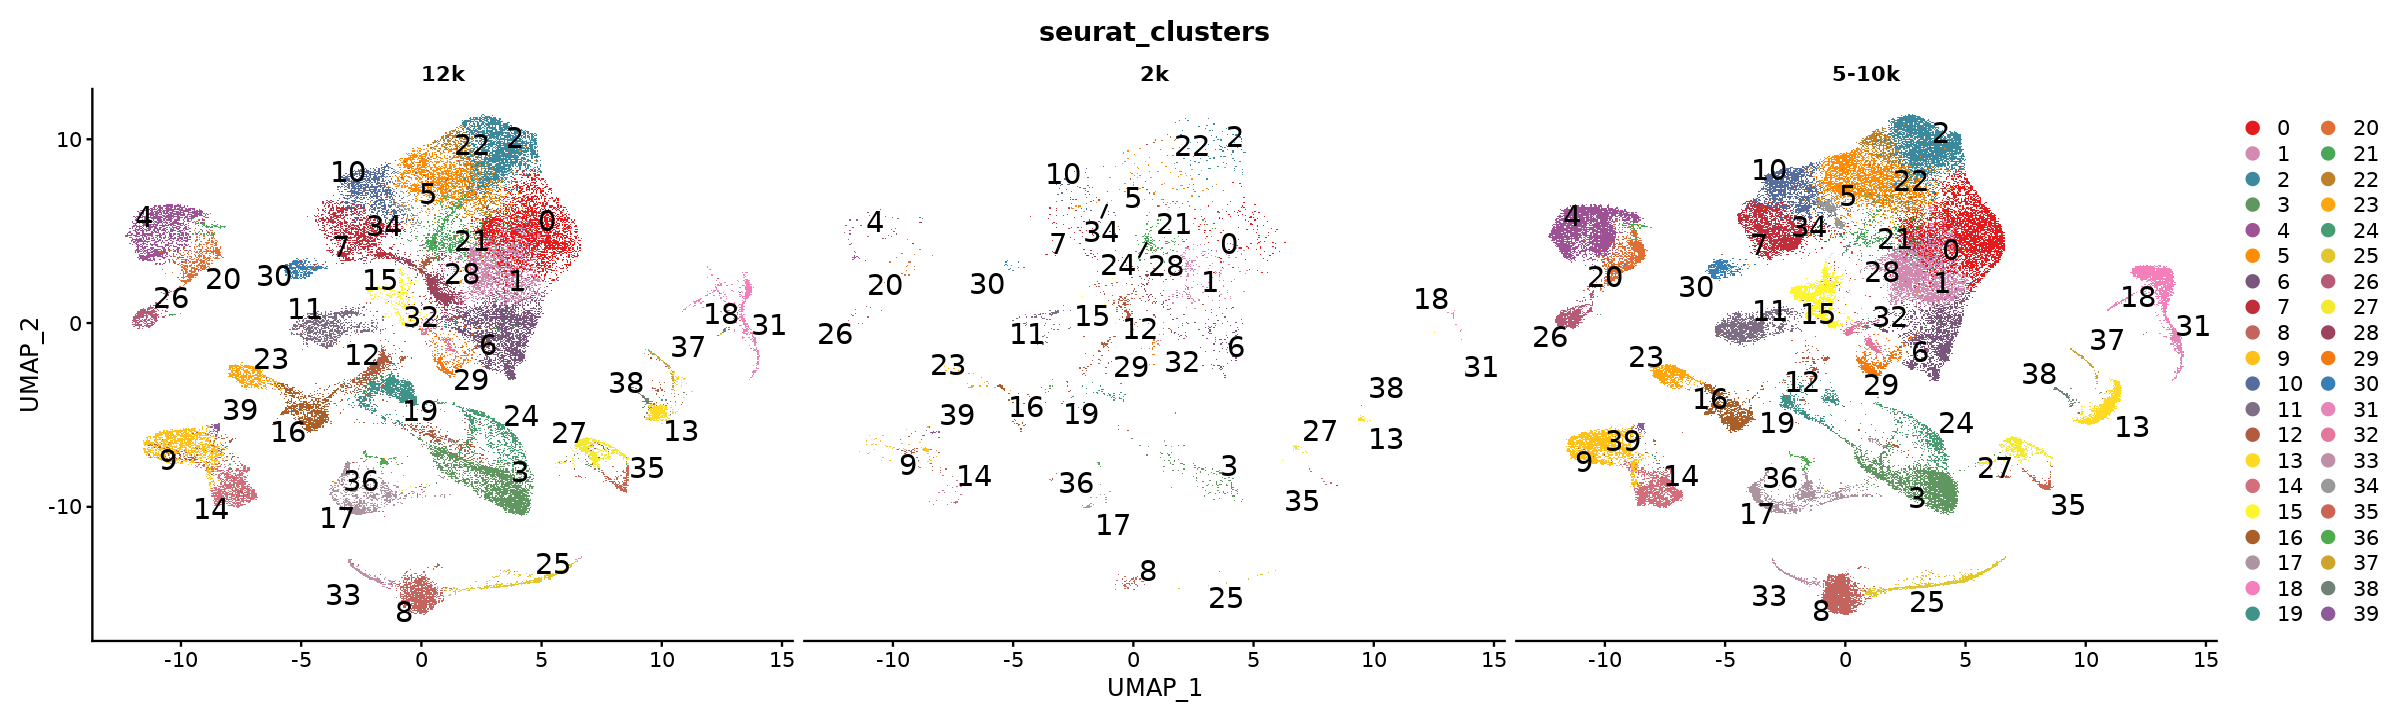

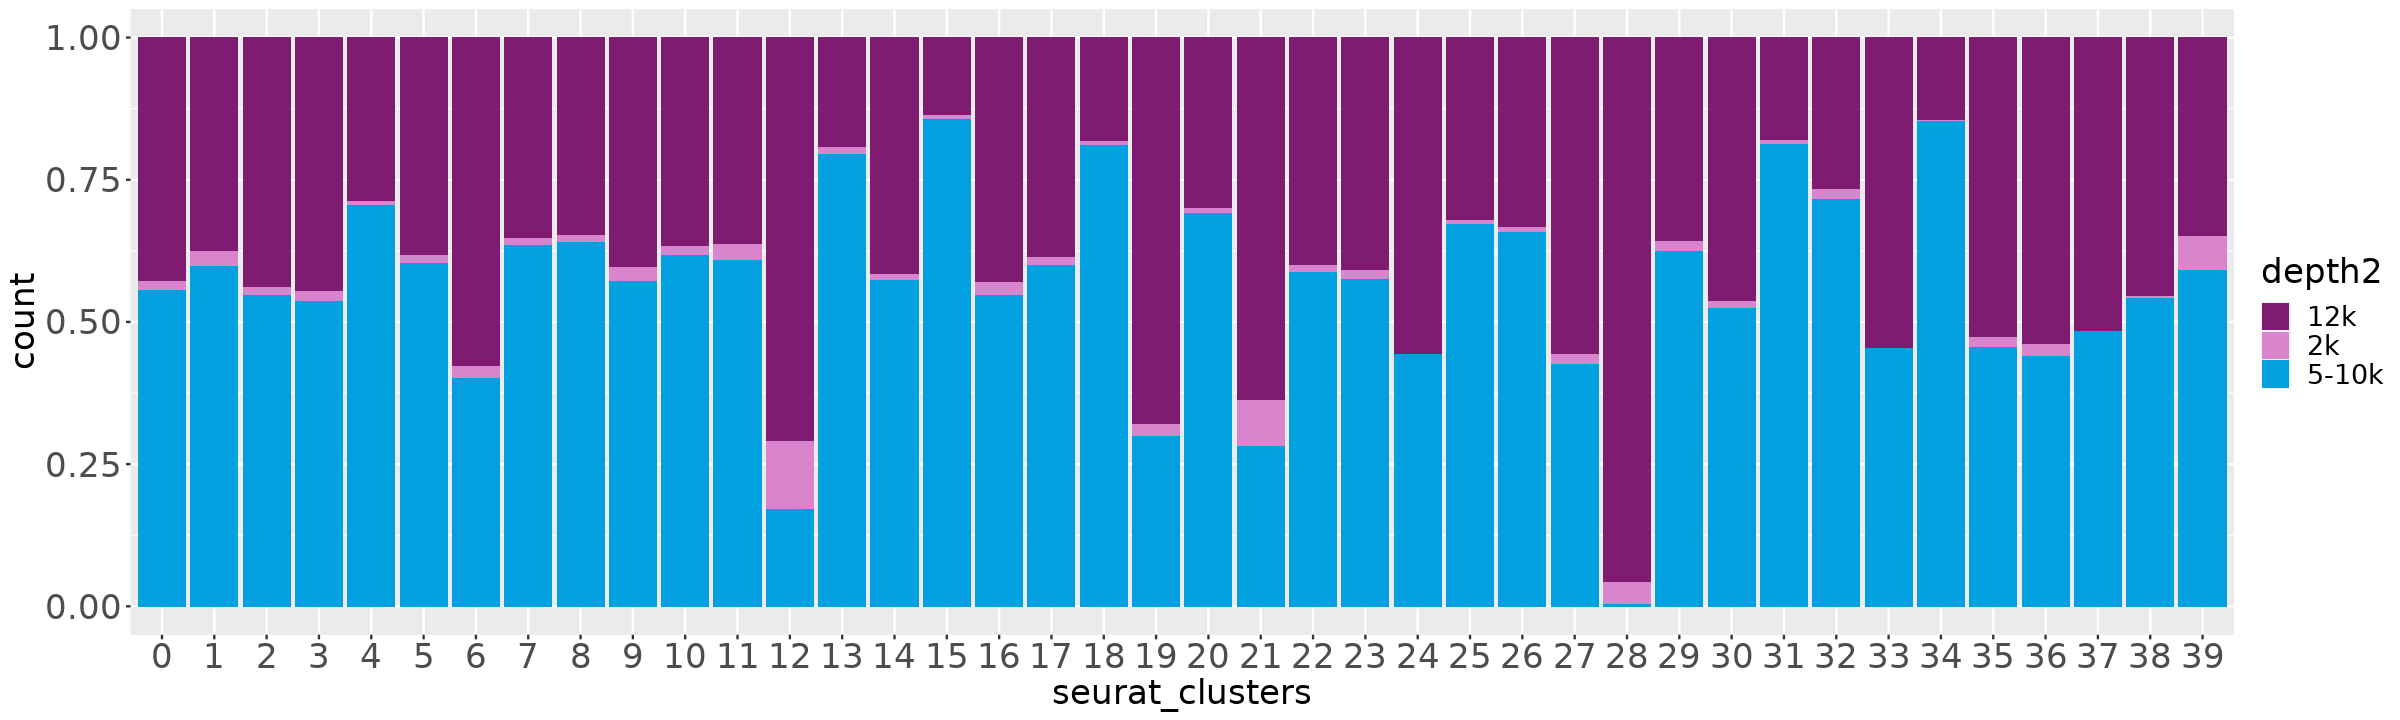

In [11]:
options(repr.plot.width = 20, repr.plot.height = 6)

p = DimPlot(obj, reduction = "umap", group.by = "seurat_clusters",
            split.by = "depth2", label = TRUE, 
            label.size = 6, repel = TRUE, cols = cluster_cols)
p1 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=depth2)) + geom_bar(position = "fill") + 
    scale_fill_manual(values = rev(depth2_cols)) +
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20), 
          axis.text.y = element_text(size = 20))

p
p1

In [12]:
pdf(file="../../plots/clustering/Parse_10x_experiment_distribution.pdf",
    width = 20, height = 6)
p
p1
dev.off()

png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



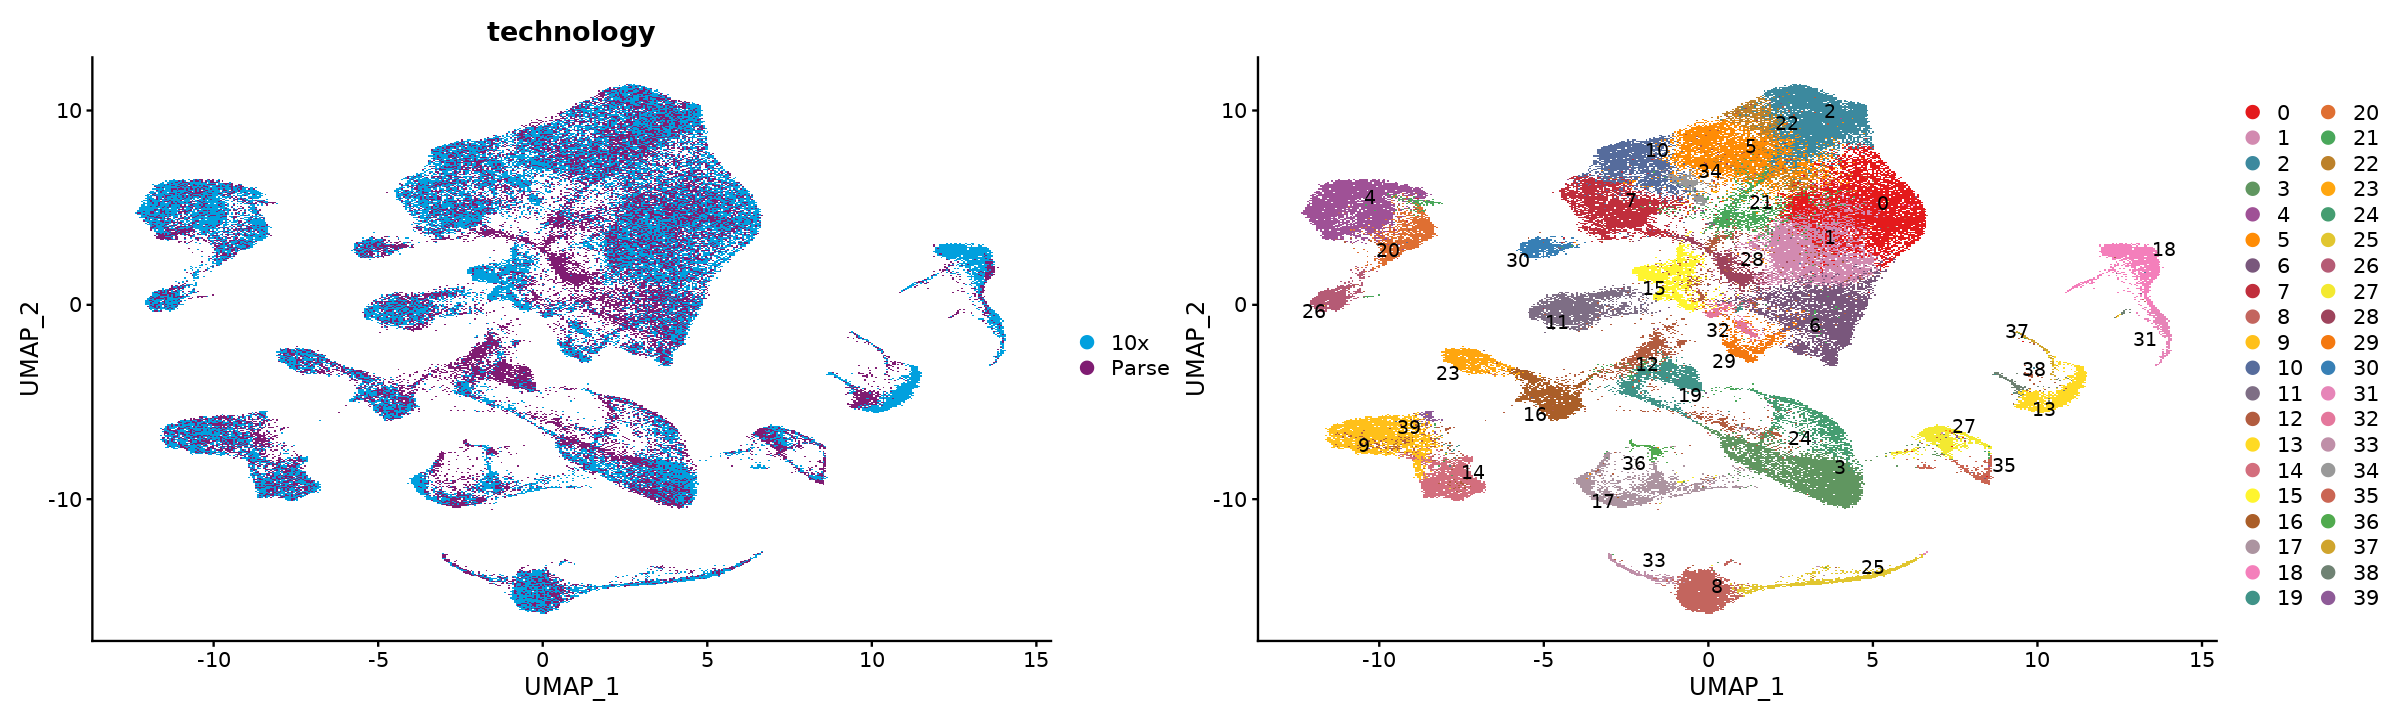

In [13]:
p1 = DimPlot(obj, reduction = "umap", group.by = "technology", shuffle = T) + scale_color_manual(values = tech_cols)
p2 = DimPlot(obj, reduction = "umap", label = TRUE, repel = TRUE, cols = cluster_cols)
p1 + p2

In [14]:
pdf(file="../../plots/clustering/UMAP_Parse_10x.pdf",
    width = 20, height = 8)
p1 + p2
dev.off()

png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



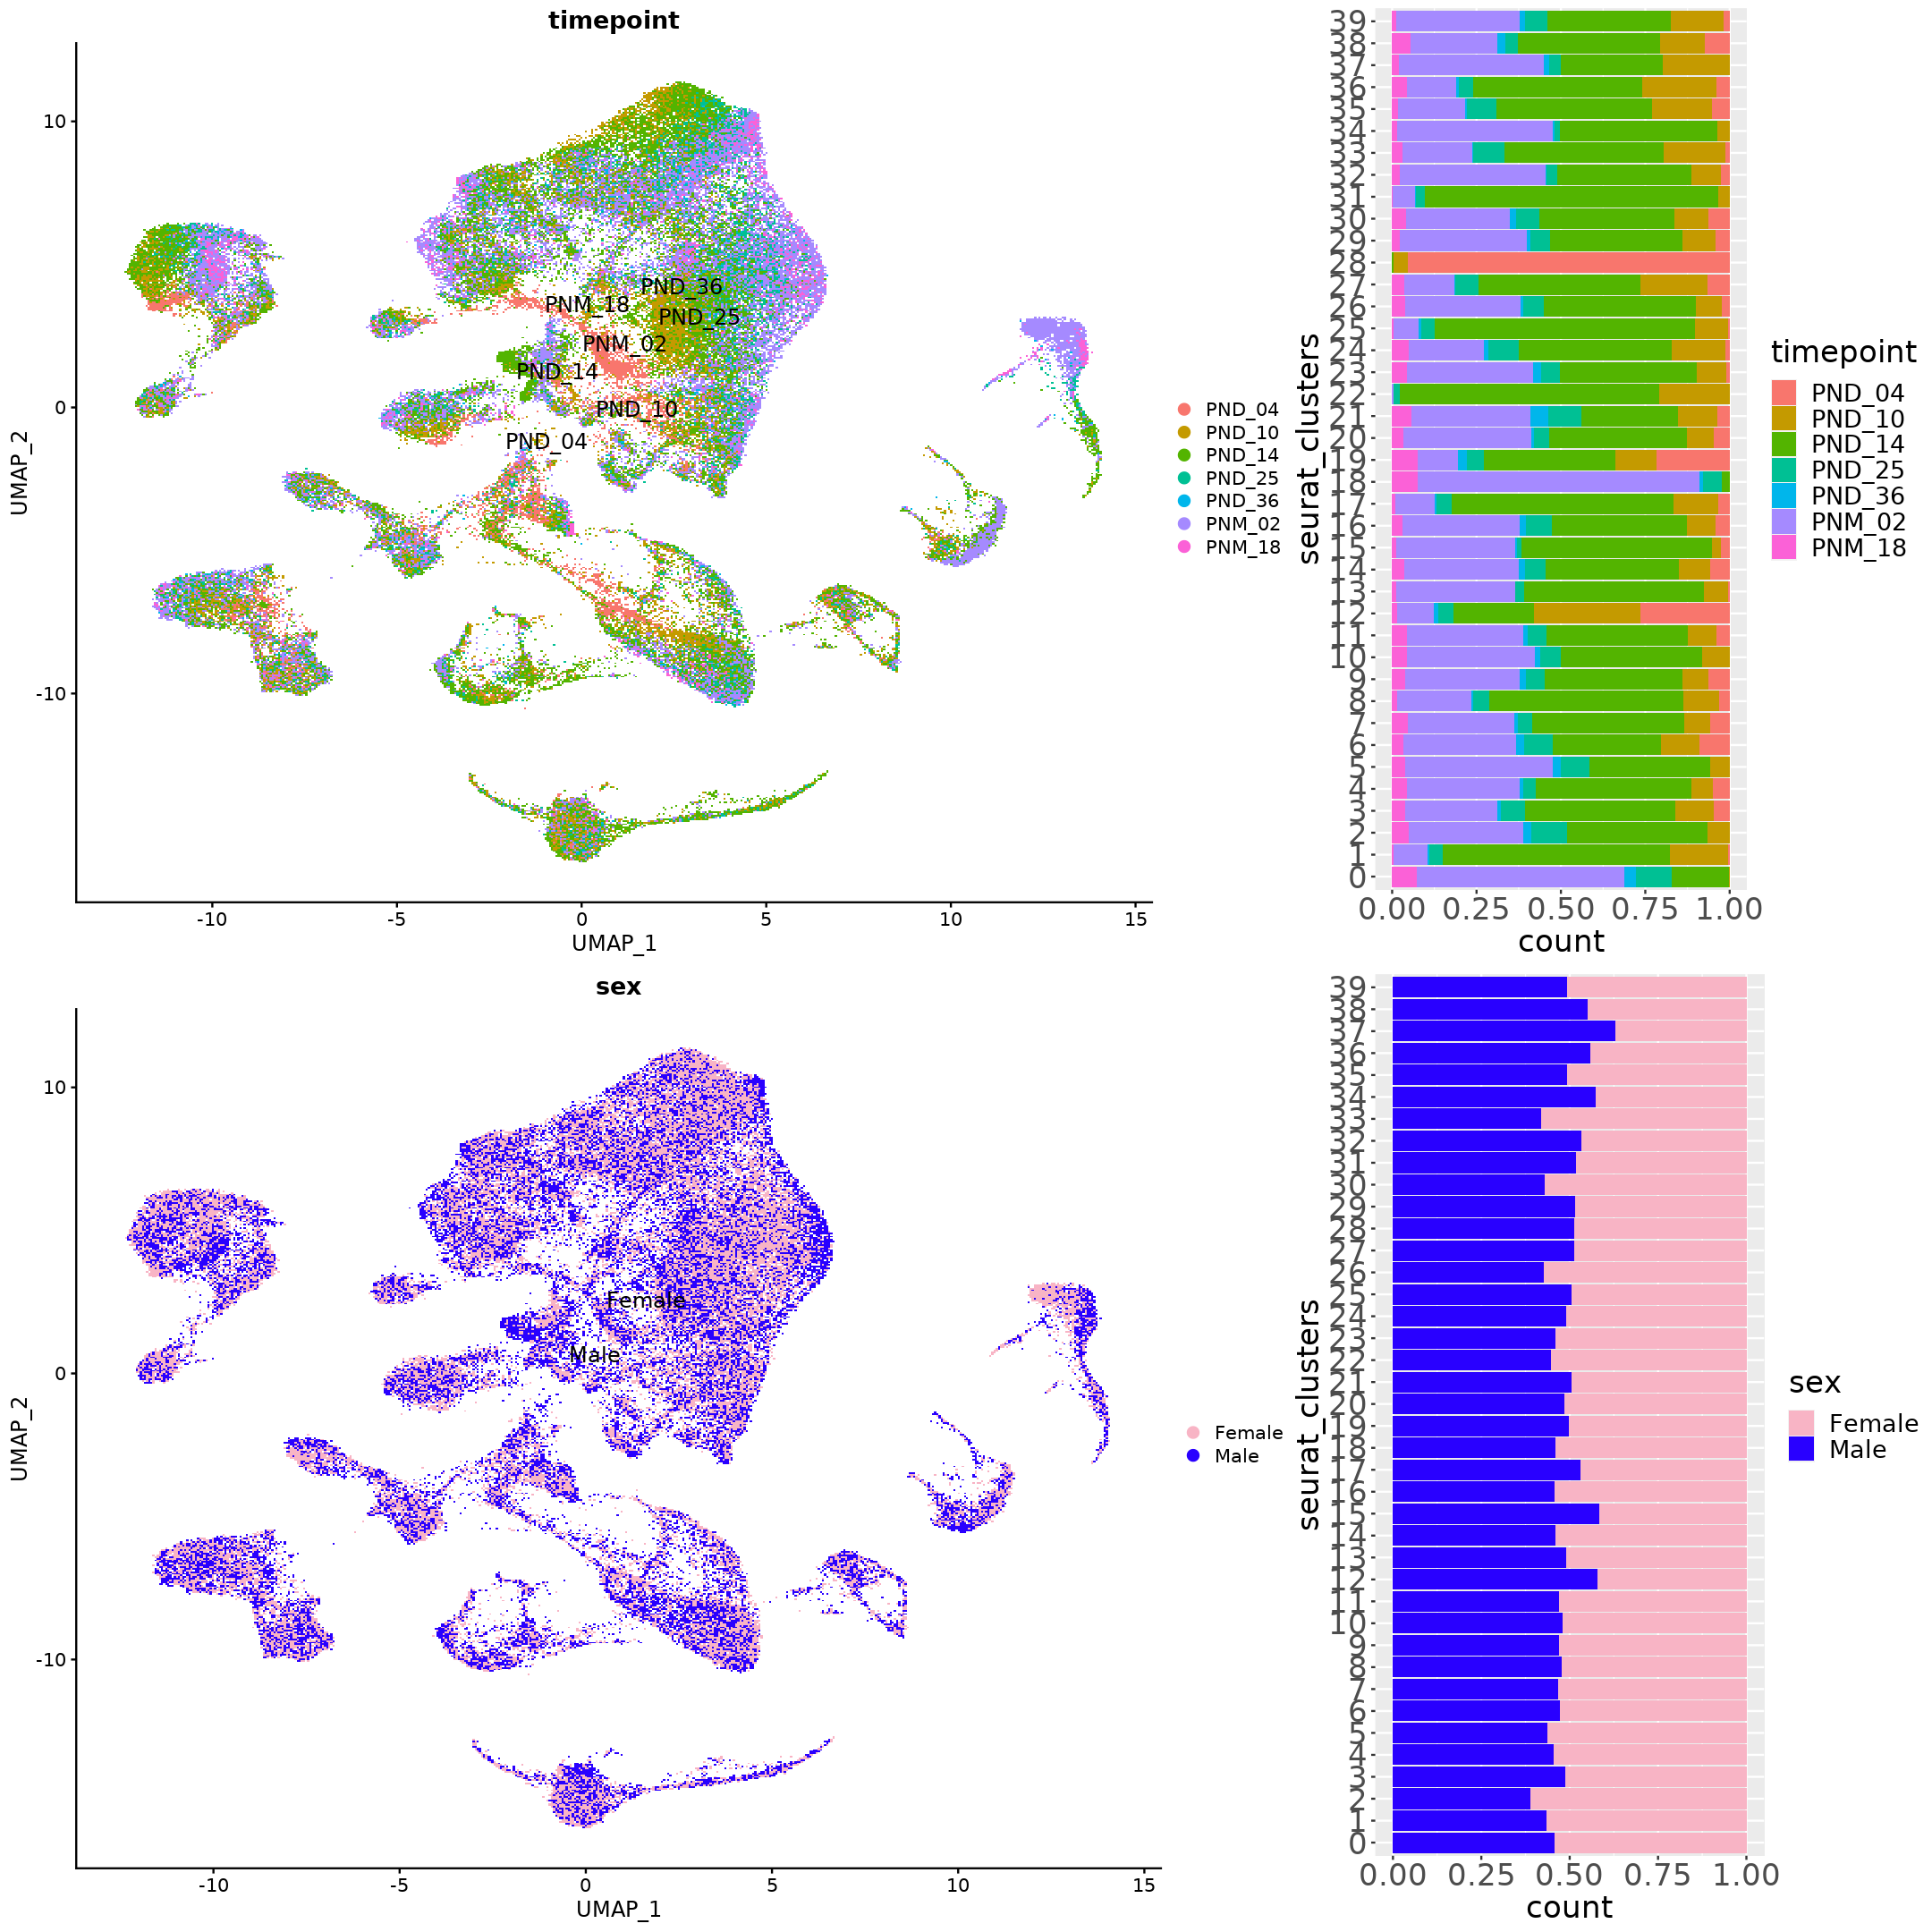

In [15]:
options(repr.plot.width = 18, repr.plot.height = 18)

p1 = DimPlot(obj, reduction = "umap", group.by = "timepoint", label = TRUE, label.size = 5, repel = TRUE)
p2 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=timepoint)) + geom_bar(position = "fill") + 
theme(text = element_text(size = 20), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20)) & coord_flip()

p3 = DimPlot(obj, reduction = "umap", group.by = "sex", label = TRUE, label.size = 5, repel = TRUE, shuffle = T) + scale_color_manual(values = sex_cols)
p4 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=sex)) + geom_bar(position = "fill") + scale_fill_manual(values = sex_cols) +
theme(text = element_text(size = 20), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20)) & coord_flip()
gridExtra::grid.arrange(
  p1, p2, p3, p4,
  widths = c(2,1),
  layout_matrix = rbind(c(1, 2),
                        c(3, 4)))



In [16]:
pdf(file="../../plots/clustering/UMAP_age_sex_barplot.pdf",
    width = 18, height = 18)
gridExtra::grid.arrange(
  p1, p2, p3, p4,
  widths = c(2,1),
  layout_matrix = rbind(c(1, 2),
                        c(3, 4)))

dev.off()

png 
  2

# Celltype annotation

### Check predictions

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
"ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 118 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


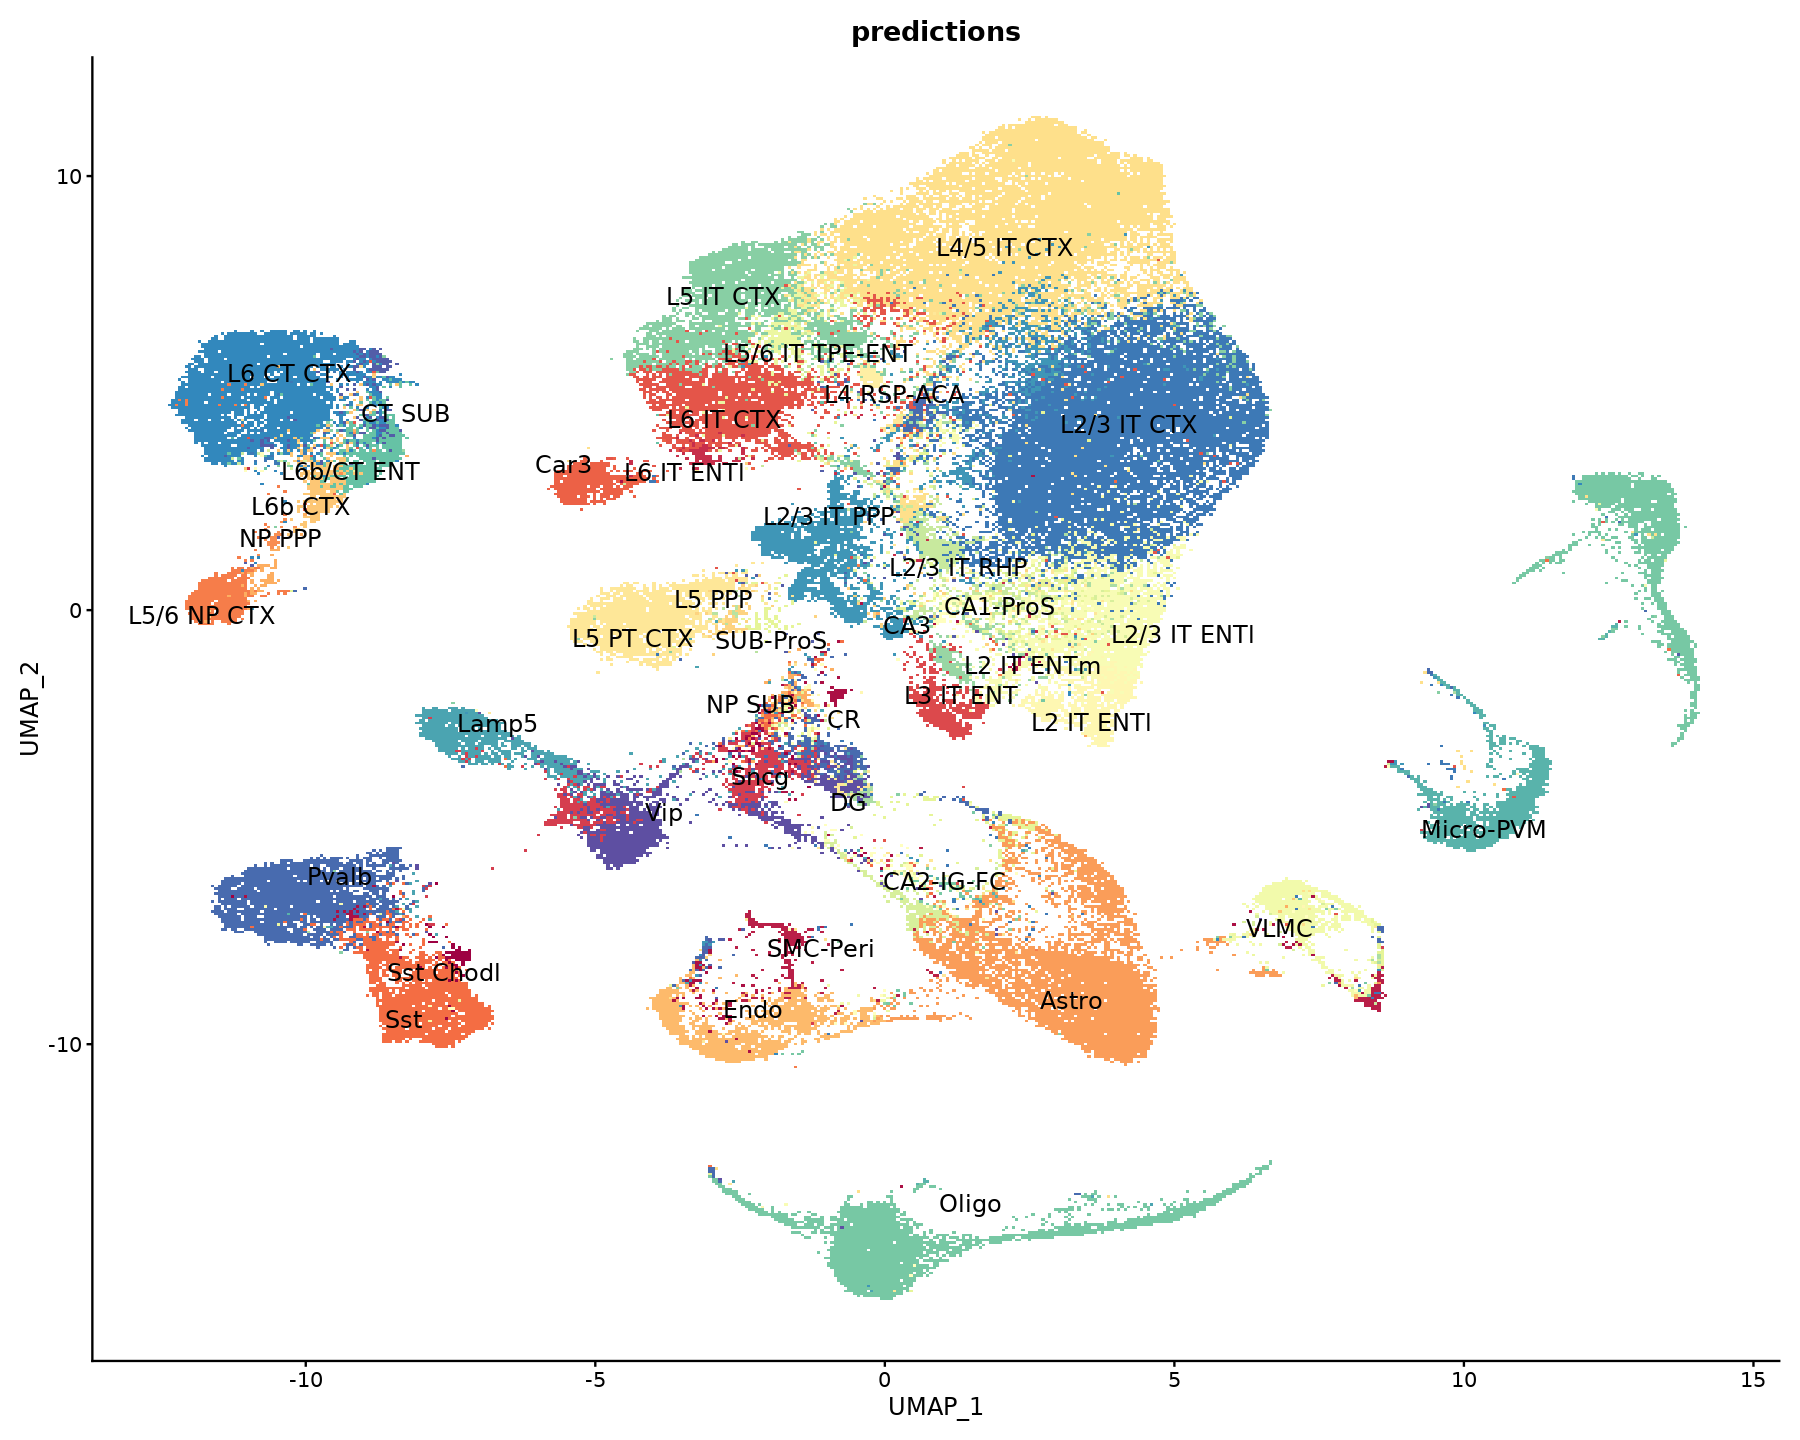

Warning message:
"ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


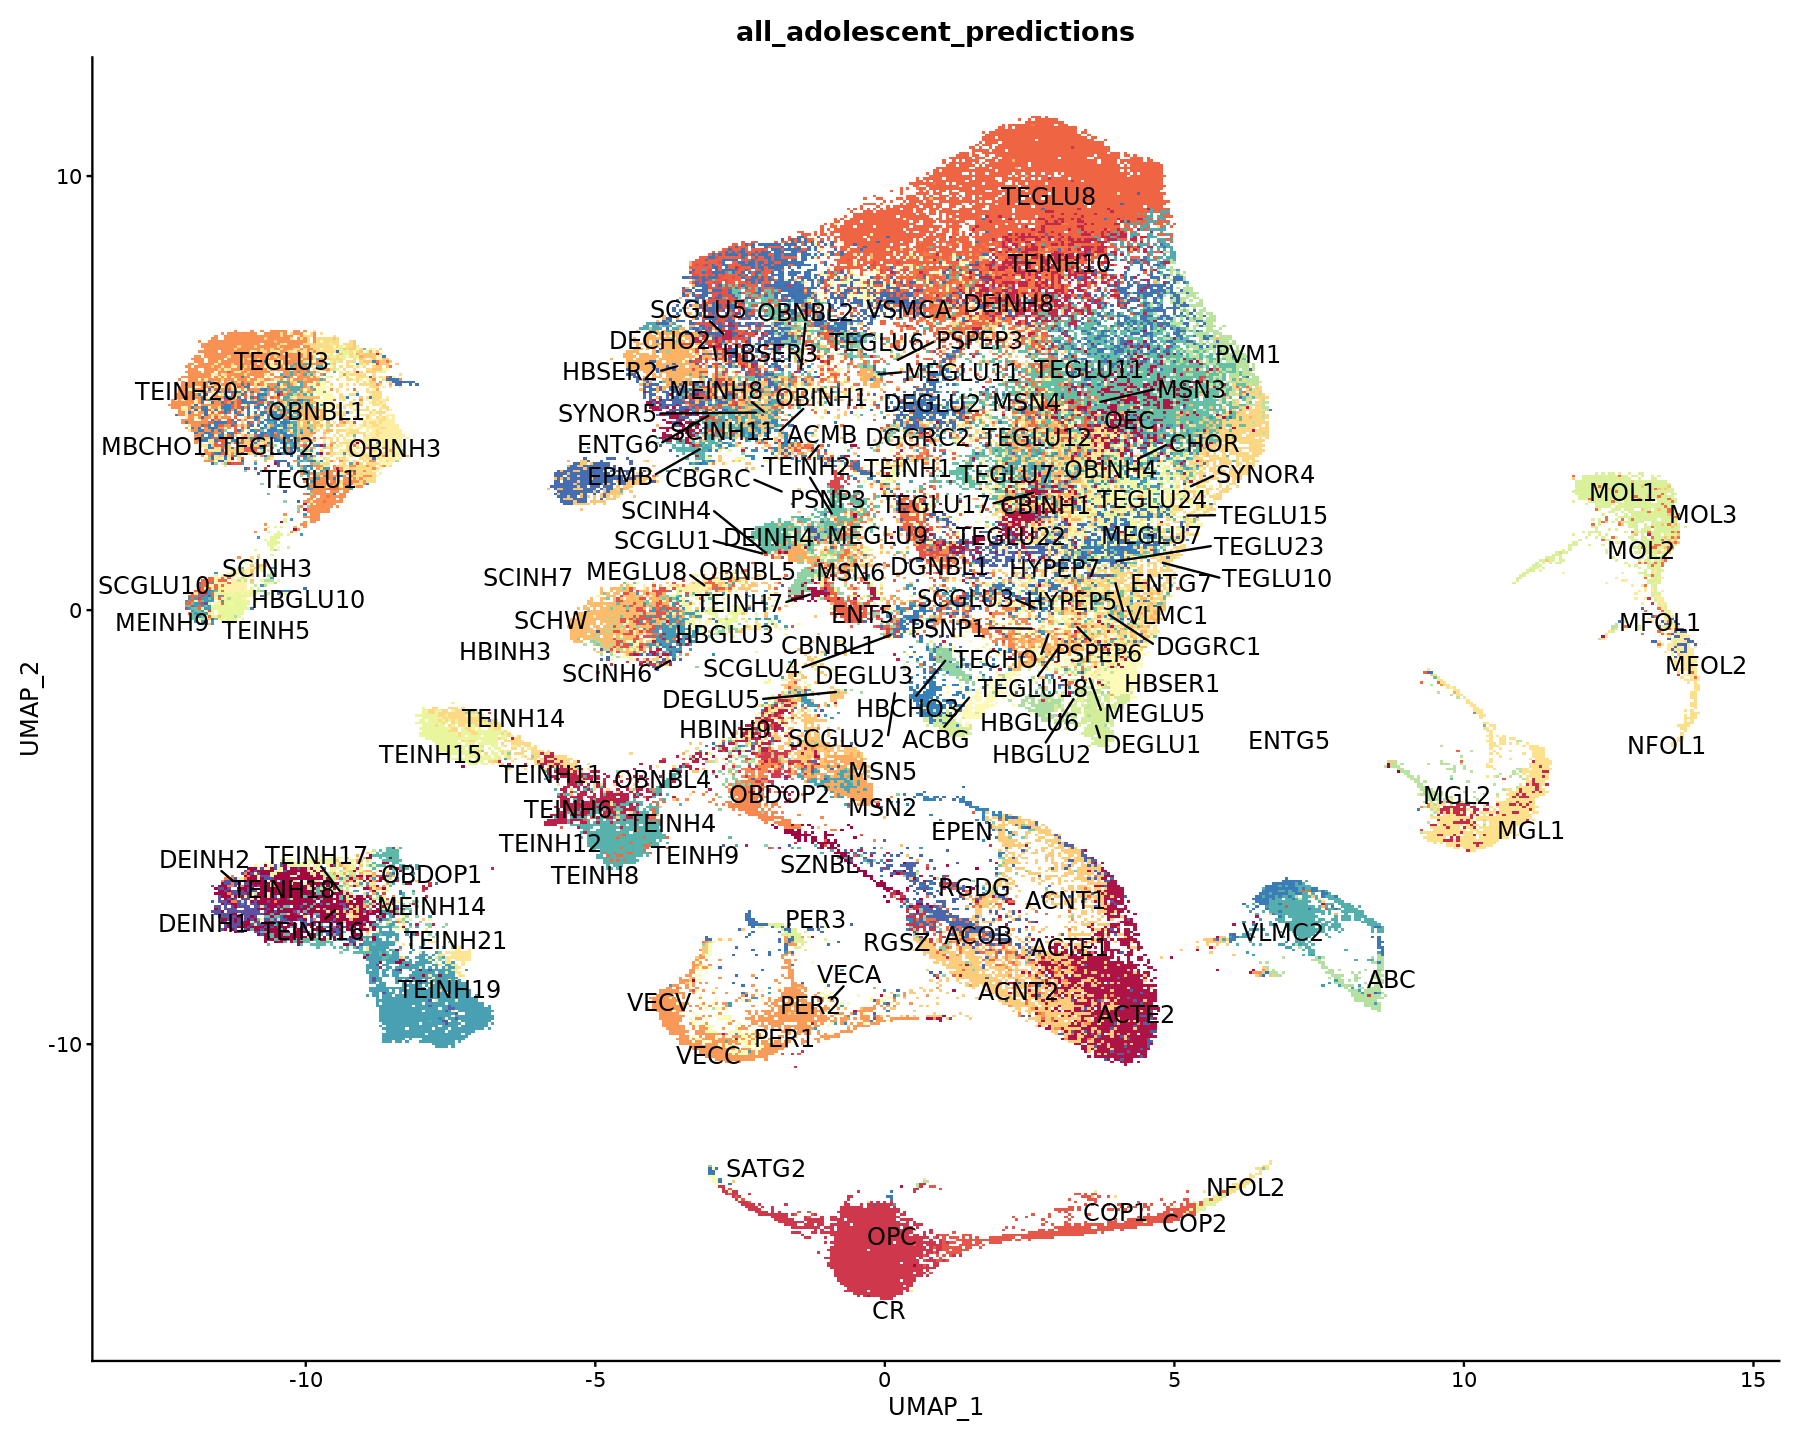

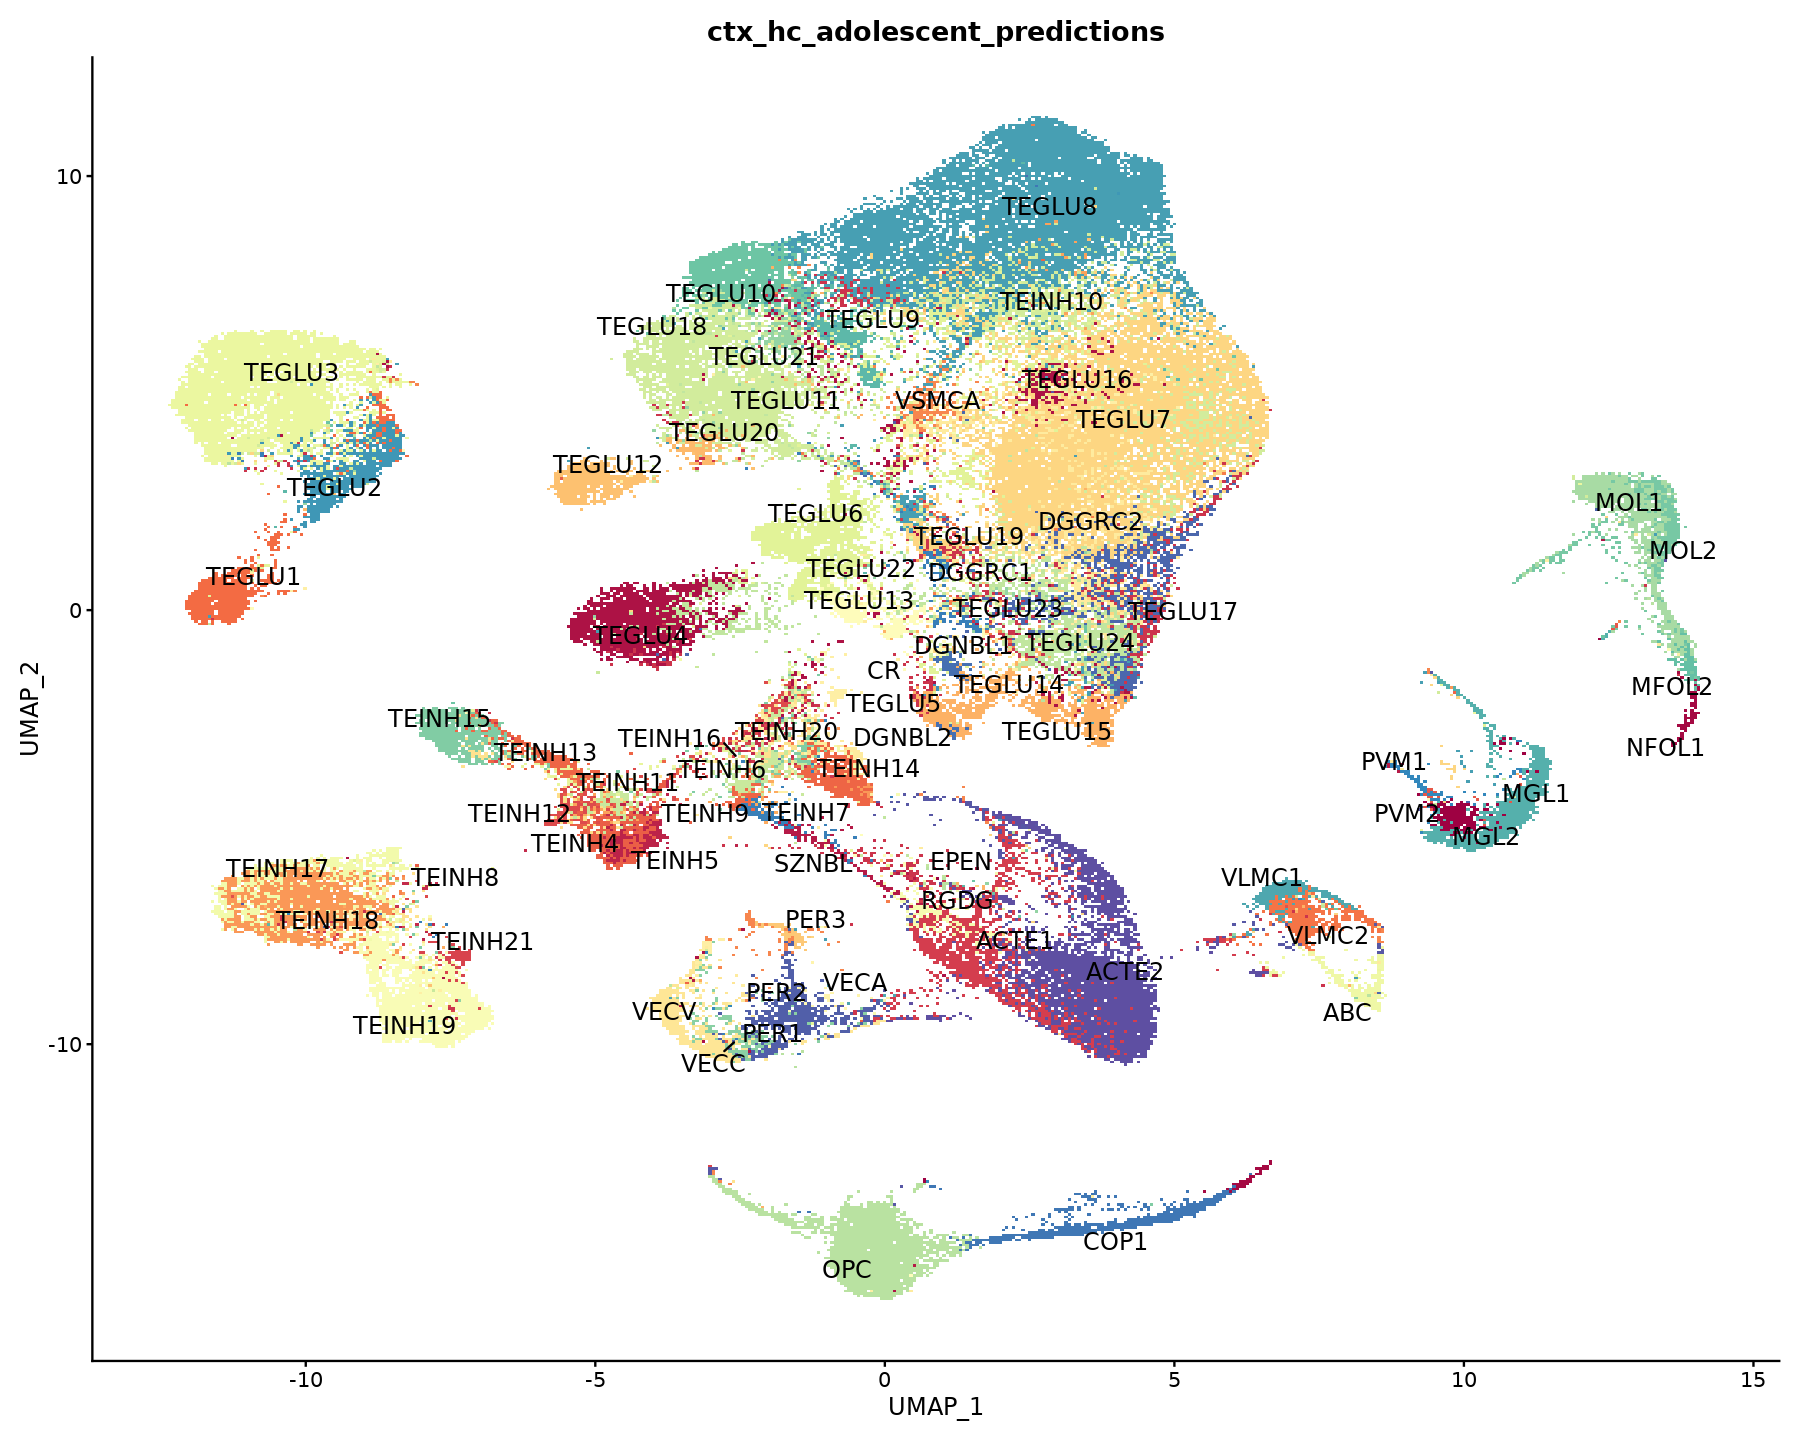

In [17]:
options(repr.plot.width = 15, repr.plot.height = 12)

cols = sample(spectral_cols(obj@meta.data,"predictions"))
umap1 = DimPlot(obj, reduction = "umap", group.by = "predictions", label = TRUE, 
                        label.size = 5, repel = TRUE) + 
    scale_color_manual(values = cols)

cols = sample(spectral_cols(obj@meta.data,"all_adolescent_predictions"))
umap2 = DimPlot(obj, reduction = "umap", group.by = "all_adolescent_predictions", label = TRUE, 
                        label.size = 5, repel = TRUE)+ 
    scale_color_manual(values = cols)

cols = sample(spectral_cols(obj@meta.data,"ctx_hc_adolescent_predictions"))
umap3 = DimPlot(obj, reduction = "umap", group.by = "ctx_hc_adolescent_predictions", label = TRUE, 
                        label.size = 5, repel = TRUE) +
    scale_color_manual(values = cols)

umap1 & NoLegend()
umap2 & NoLegend()
umap3 & NoLegend()



In [18]:
pdf(file="../../plots/annotation/UMAPs_predictions.pdf",
    width = 15, height = 12)
umap1 & NoLegend()
umap2 & NoLegend()
umap3 & NoLegend()
dev.off()


Warning message:
"ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


png 
  2

### Check marker gene expression

In [19]:
DefaultAssay(obj) = "SCT"

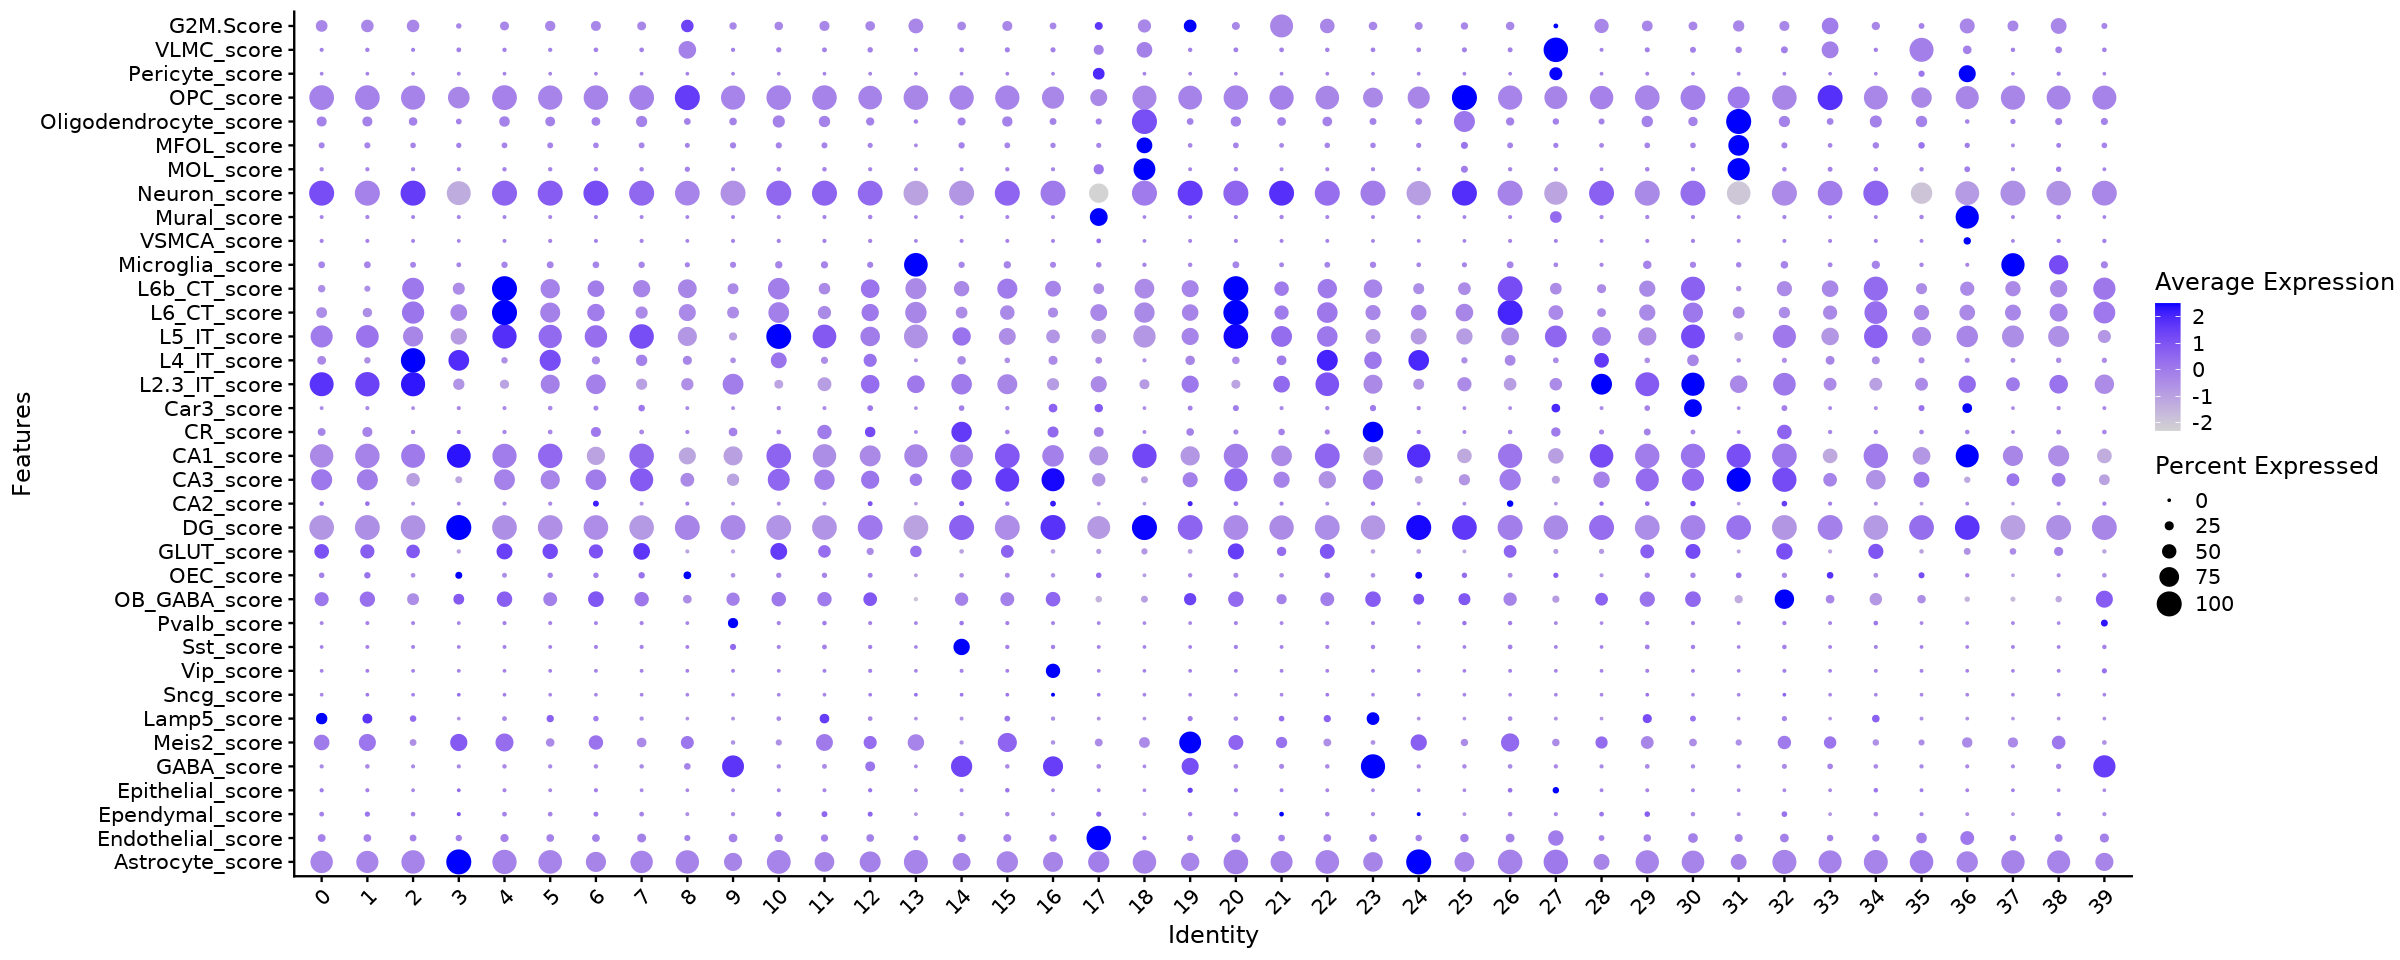

In [20]:
markers = read.csv("../../../ref/IGVF_curated_markers.csv")
markers = markers[markers$Tissue == markers_tissue,]
markers = markers[markers$Gene %in% rownames(obj),]

for (celltype in unique(markers$Subtype)){
    label = paste0(celltype,"_score")
    genes = unique(markers$Gene[markers$Subtype == celltype])
    obj[[label]] = PercentageFeatureSet(obj,features = genes)
    
}
options(repr.plot.width = 20, repr.plot.height= 8)
Idents(obj) = obj$seurat_clusters
p = DotPlot(obj, features =  c(paste0(unique(markers$Subtype),"_score"),"G2M.Score"))+ 
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) & coord_flip() 
p

In [21]:
pdf(file="../../plots/annotation/cluster_marker_dotplot.pdf",width = 24, height = 5)
p
dev.off()

png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To di

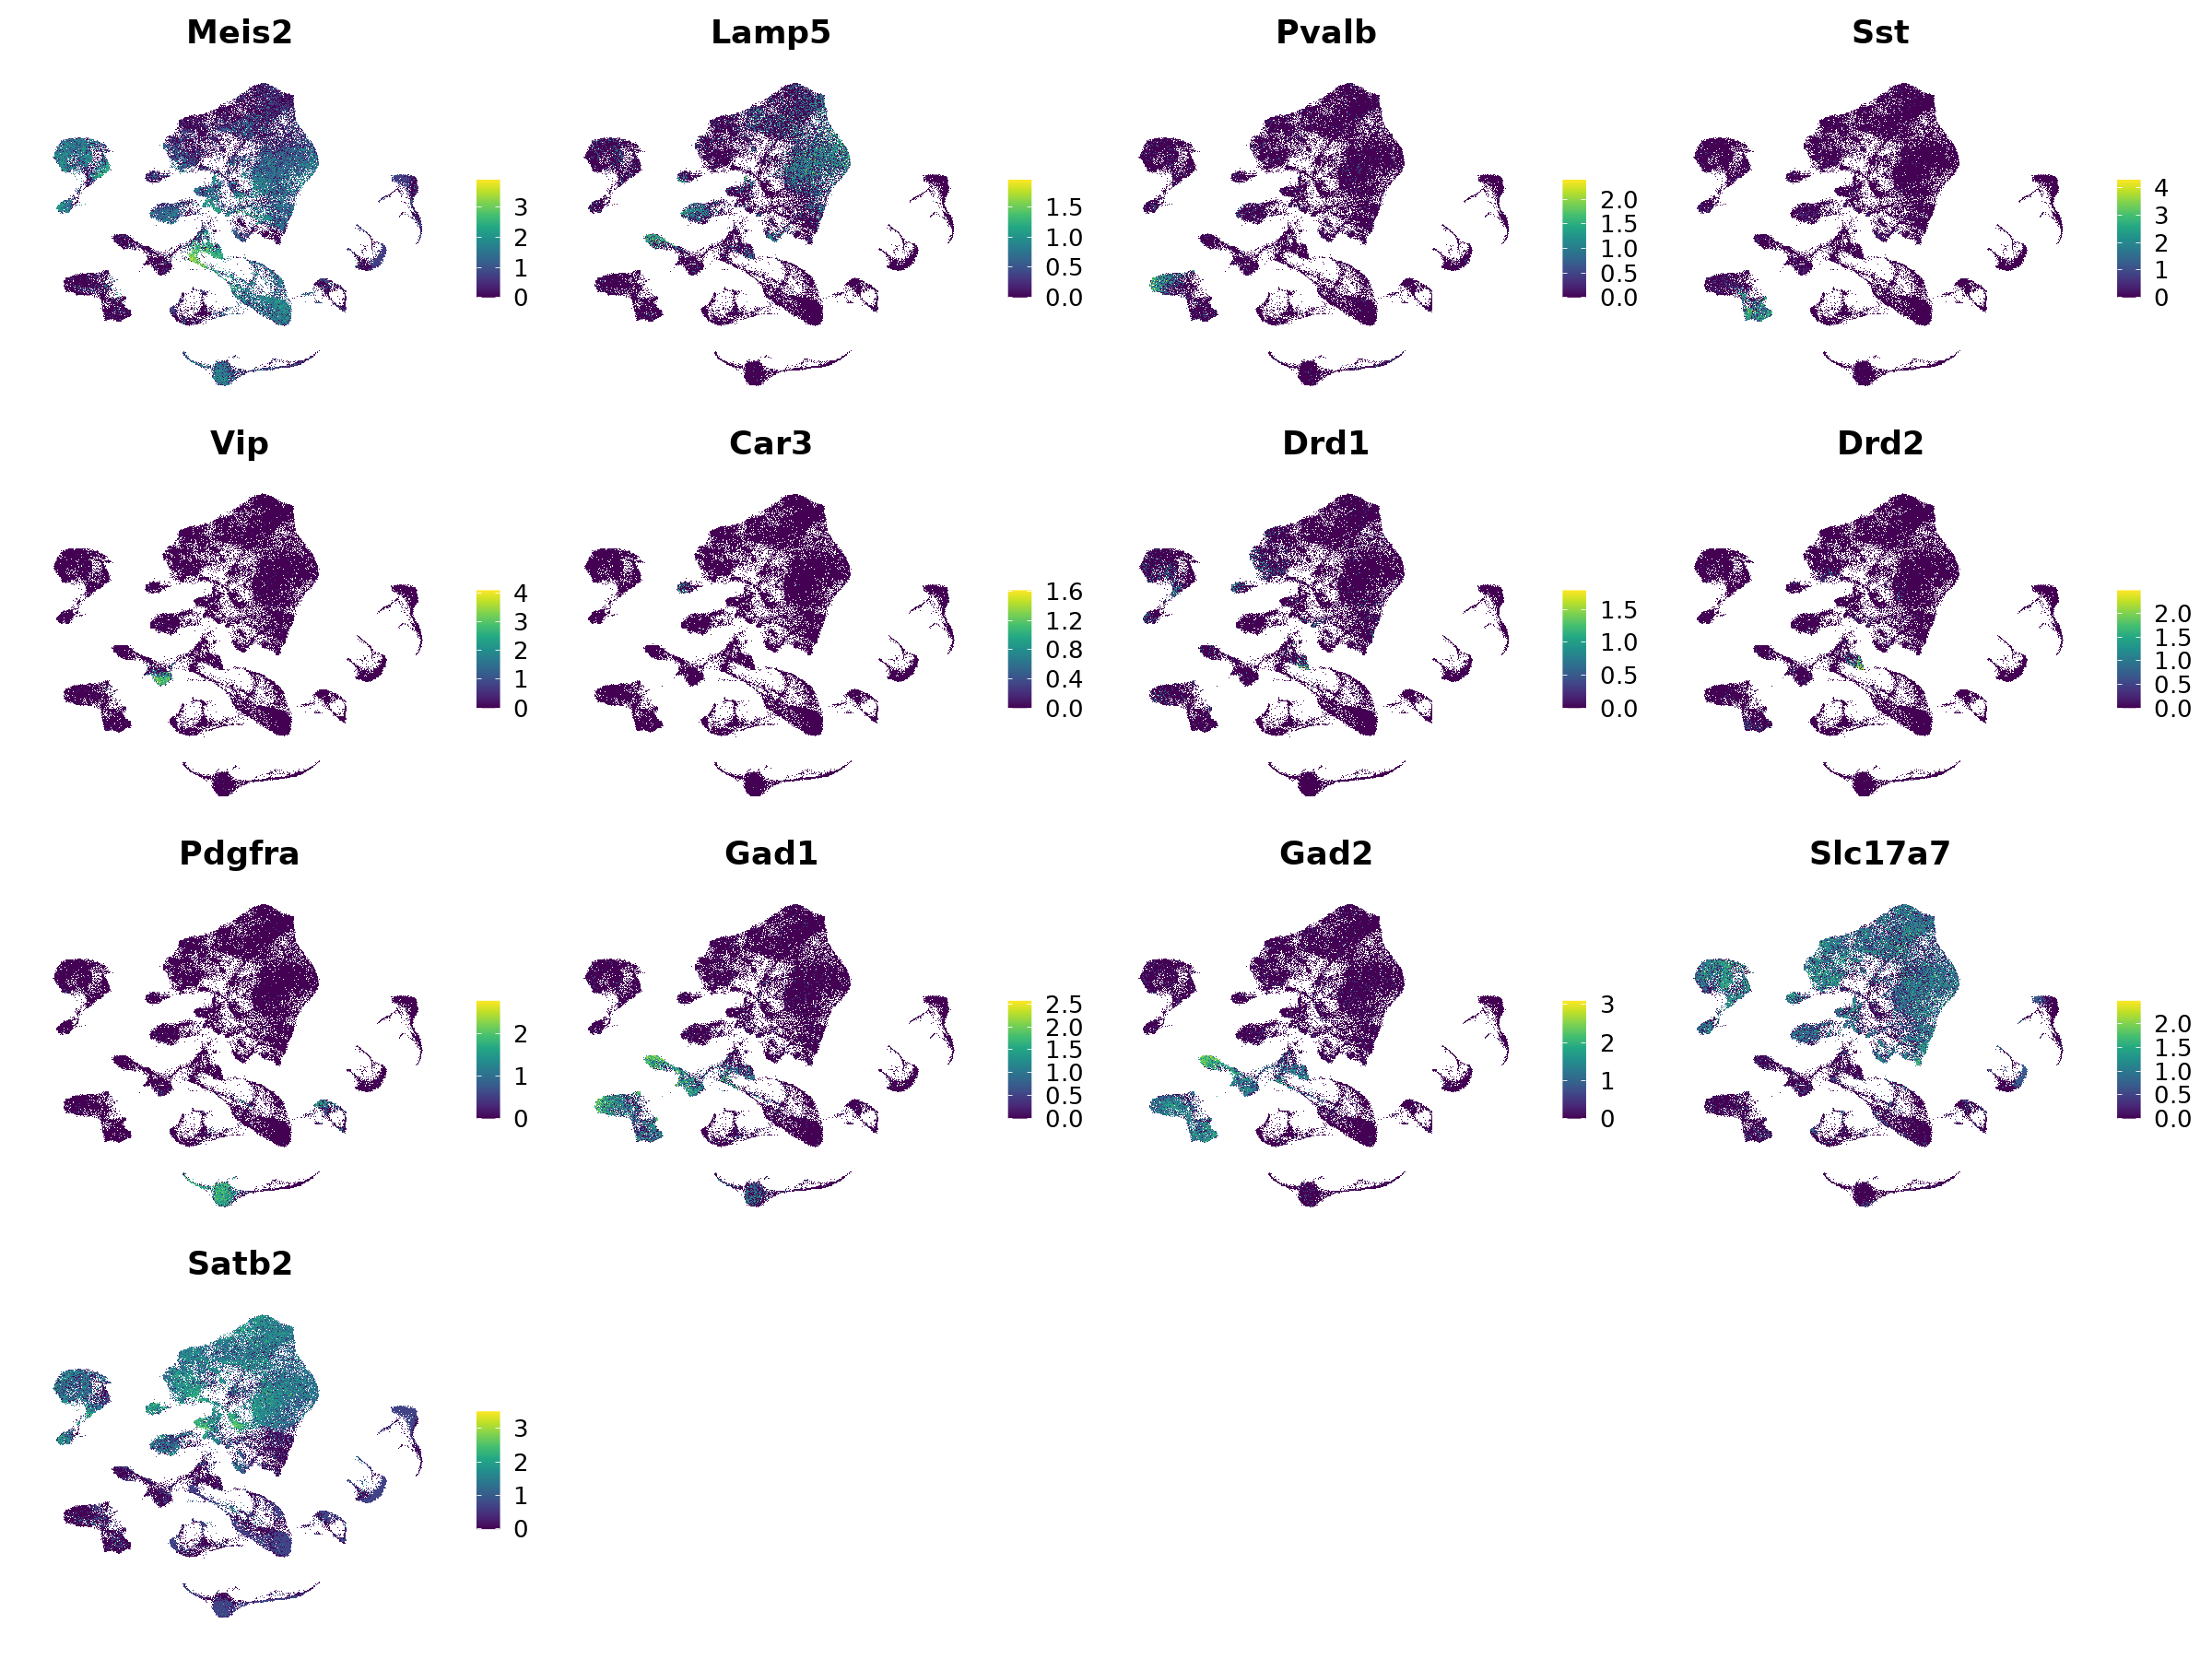

In [22]:
options(repr.plot.width = 20, repr.plot.height= 15)

featureplot(obj, c("Meis2",
                        "Lamp5",
                        "Pvalb",
                        "Sst",
                        "Vip",
                        "Car3",
                        "Drd1",
                        "Drd2",
                        "Pdgfra",
                         "Gad1","Gad2",
                        "Slc17a7","Satb2"))


In [23]:
pdf(file="../../plots/annotation/celltype_featureplot.pdf",width = 20, height = 15)
featureplot(obj, c("Meis2",
                        "Lamp5",
                        "Pvalb",
                        "Sst",
                        "Vip",
                        "Car3",
                        "Drd1",
                        "Drd2",
                        "Pdgfra",
                         "Gad1","Gad2",
                        "Slc17a7","Satb2"))
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To di

png 
  2

## Order clusters

In [24]:
Idents(obj) = obj$seurat_clusters
order = c(3,24, # astrocyte
          17, # endothelial
          12, # gaba_early
          19, # meis2_GABA
          23, # lamp5_GABA
          16, # Vip_GABA
          14, # Sst_GABA
          39,9, # Pvalb_GABA
          30, # Car3_glut
          6,1,0,21, # l2/3_IT
          15, # l2/3_IT_PPP
          32,29, # L3-IT-ent
          2,22,5, # l4_it
          34,10, # l5 it
          11, # L5_PT
          7, # l6 it
          4,20, # l6/6b
          26, # np_sub
          28, # PND04 glut neuron
          13,37,38, # microglia
          18, # mol
          31, # mfol
          25, # cop
          8,33, # opc
          36, # pericyte
          27,35 # vlmc          
         )

Idents(obj) = factor(Idents(obj), levels = order)



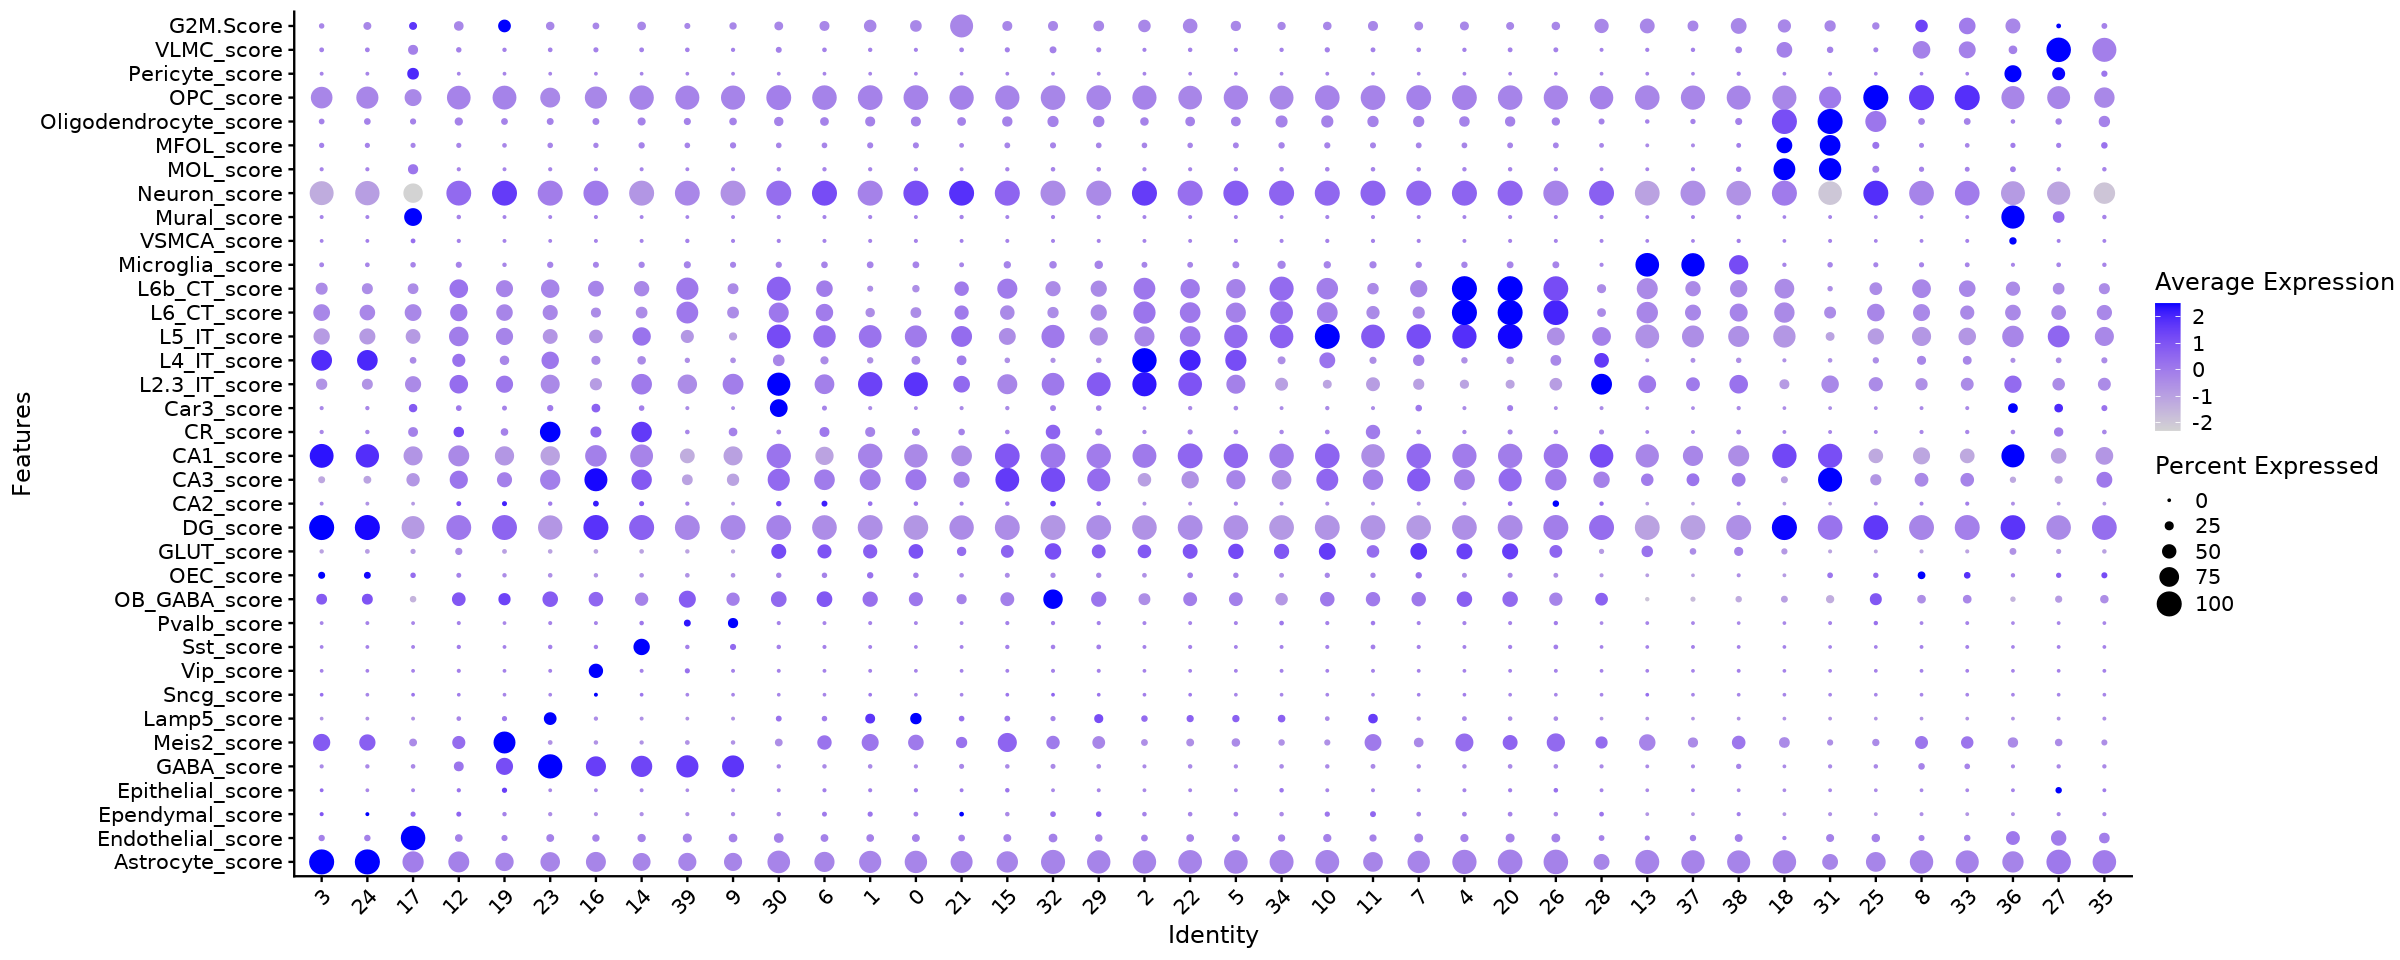

In [25]:
options(repr.plot.width = 20, repr.plot.height= 8)
p = DotPlot(obj, features =  c(paste0(unique(markers$Subtype),"_score"),"G2M.Score"))+ 
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) & coord_flip() 
p

In [26]:
pdf(file="../../plots/annotation/cluster_marker_dotplot_sorted.pdf",width = 24, height = 5)
p
dev.off()

png 
  2

## Name clusters

In [27]:
subtypes = c(rep("Astrocyte",2),# 3,24,
              "Endothelial", # 17
              "GABA_early",# 12
              "Meis2",# 19, 
              "Lamp5", #23
              "Vip", # 16
              "Sst", # 14
              rep("Pvalb",2), # 9,39
              "Car3", # 30
              rep("L2/3_IT",4), # 1, 0, 6,21
              "L2/3_IT_PPP", # 15
              rep("L3_IT_ENT",2), # 32,29
              rep("L4_IT",3), #2,22,5,
              rep("L5_IT",2), # 10, 34
              "L5_PT", # 11
              "L6_IT", # 7
              rep("L6/6b_CT",2), # 4,20
              "NP_SUB", # 26
              "Glut_early", # 28
              rep("Microglia",3), #13,37,38,
              "MOL", #18
              "MFOL", # 31
              "COP", # 25
              rep("OPC",2), #8,33,
              "Pericyte", # 36
              rep("VLMC",2) #27,35
             )

names(subtypes) = levels(Idents(obj))
obj = RenameIdents(obj, subtypes)

order = c("Astrocyte","Endothelial",
          "GABA_early","Meis2","Lamp5","Vip","Sst","Pvalb",
          "Glut_early","Car3","L2/3_IT","L2/3_IT_PPP","L3_IT_ENT","L4_IT","L5_IT","L5_PT","L6_IT","L6/6b_CT","NP_SUB",
          "Microglia",
          "MOL","MFOL","COP","OPC",
          "Pericyte","VLMC")
Idents(obj) = factor(Idents(obj), levels = order)
obj$subtypes = Idents(obj)
table(obj$subtypes)

obj$celltypes = obj$subtypes
obj$celltypes = gsub("MOL","Oligodendrocyte",obj$celltypes)
obj$celltypes = gsub("MFOL","Oligodendrocyte",obj$celltypes)
obj$celltypes = gsub("COP","Oligodendrocyte",obj$celltypes)
obj$celltypes = gsub("Glut_early","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("Car3","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("L2/3_IT_PPP","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("L2/3_IT","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("L3_IT_ENT","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("L4_IT","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("L5_IT","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("L5_PT","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("L6_IT","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("L6/6b_CT","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("NP_SUB","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("GABA_early","GABAergic",obj$celltypes)
obj$celltypes = gsub("Meis2","GABAergic",obj$celltypes)
obj$celltypes = gsub("Lamp5","GABAergic",obj$celltypes)
obj$celltypes = gsub("Vip","GABAergic",obj$celltypes)
obj$celltypes = gsub("Sst","GABAergic",obj$celltypes)
obj$celltypes = gsub("Pvalb","GABAergic",obj$celltypes)
order = c("Astrocyte","Endothelial",
          "GABAergic",
          "Glutamatergic",
          "Microglia",
          "Oligodendrocyte","OPC",
          "Pericyte","VLMC")
obj$celltypes = factor(obj$celltypes, levels = order)
table(obj$celltypes)

obj$gen_celltype = gsub("GABAergic","Neuron",obj$gen_celltype)
obj$gen_celltype = gsub("Glutamatergic","Neuron",obj$gen_celltype)
obj$gen_celltype = gsub("Microglia","Immune",obj$gen_celltype)
obj$gen_celltype = gsub("Oligodendrocyte","Glial",obj$gen_celltype)
obj$gen_celltype = gsub("OPC","Glial",obj$gen_celltype)
obj$gen_celltype = gsub("Astrocyte","Glial",obj$gen_celltype)
order = c("Endothelial",
          "Neuron",
          "Immune",
          "Glial",
          "Pericyte","VLMC")
obj$gen_celltype = factor(obj$gen_celltype, levels = order)
table(obj$gen_celltype)


  Astrocyte Endothelial  GABA_early       Meis2       Lamp5         Vip 
       8560        2746        2932        2257        1624        2754 
        Sst       Pvalb  Glut_early        Car3     L2/3_IT L2/3_IT_PPP 
       2843        4376        1336        1023       24398        2782 
  L3_IT_ENT       L4_IT       L5_IT       L5_PT       L6_IT    L6/6b_CT 
       1819       15595        4073        3147        4615        8661 
     NP_SUB   Microglia         MOL        MFOL         COP         OPC 
       1386        3426        2581         760        1406        4765 
   Pericyte        VLMC 
        335        1918 


      Astrocyte     Endothelial       GABAergic   Glutamatergic       Microglia 
           8560            2746           16786           68835            3426 
Oligodendrocyte             OPC        Pericyte            VLMC 
           4747            4765             335            1918 


Endothelial      Neuron      Immune       Glial    Pericyte        VLMC 
       2746       85621        3426       18072         335        1918 

## Update metadata for integration with other ENCODE data
submission_celltype, cell_type_mnemonic, CL_ID_annotation

In [28]:
obj$submission_celltype  = obj$celltypes
obj$submission_celltype = gsub("Astrocyte","astrocyte",obj$submission_celltype)
obj$submission_celltype = gsub("Endothelial","endothelial cell",obj$submission_celltype)
obj$submission_celltype = gsub("GABAergic","inhibitory neuron",obj$submission_celltype)
obj$submission_celltype = gsub("Glutamatergic","excitatory neuron",obj$submission_celltype)
obj$submission_celltype = gsub("Microglia","microglial cell",obj$submission_celltype)
obj$submission_celltype = gsub("Oligodendrocyte","oligodendrocyte",obj$submission_celltype)
obj$submission_celltype = gsub("OPC","oligodendrocyte precursor cell",obj$submission_celltype)
obj$submission_celltype = gsub("Pericyte","pericyte",obj$submission_celltype)
obj$submission_celltype = gsub("VLMC","vascular leptomeningeal cell",obj$submission_celltype)

table(obj$submission_celltype)

obj$cell_type_mnemonic  = obj$submission_celltype
obj$cell_type_mnemonic = gsub("astrocyte","ASTR",obj$cell_type_mnemonic)
obj$cell_type_mnemonic = gsub("\\<endothelial cell\\>","ENDO_CNS",obj$cell_type_mnemonic)
obj$cell_type_mnemonic = gsub("\\<inhibitory neuron\\>","NEU_INHB",obj$cell_type_mnemonic)
obj$cell_type_mnemonic = gsub("\\<excitatory neuron\\>","NEU_EXCT_CNS",obj$cell_type_mnemonic)
obj$cell_type_mnemonic = gsub("\\<microglial cell\\>","MGLIA_CNS",obj$cell_type_mnemonic)
obj$cell_type_mnemonic = gsub("\\<oligodendrocyte precursor cell\\>","OLIGDP_CNS",obj$cell_type_mnemonic)
obj$cell_type_mnemonic = gsub("\\<oligodendrocyte\\>","OLIGD_CNS",obj$cell_type_mnemonic)
obj$cell_type_mnemonic = gsub("\\<pericyte\\>","PERI_CNS",obj$cell_type_mnemonic)
obj$cell_type_mnemonic = gsub("\\<vascular leptomeningeal cell\\>","VLMC_CNS",obj$cell_type_mnemonic)

table(obj$cell_type_mnemonic)

obj$CL_ID_annotation  = obj$cell_type_mnemonic
obj$CL_ID_annotation = gsub("ASTR","CL:0000127",obj$CL_ID_annotation)
obj$CL_ID_annotation = gsub("ENDO_CNS","CL:0000115",obj$CL_ID_annotation)
obj$CL_ID_annotation = gsub("NEU_INHB","CL:0011005",obj$CL_ID_annotation)
obj$CL_ID_annotation = gsub("NEU_EXCT_CNS","CL:0000679",obj$CL_ID_annotation)
obj$CL_ID_annotation = gsub("MGLIA_CNS","CL:0000129",obj$CL_ID_annotation)
obj$CL_ID_annotation = gsub("\\<OLIGD_CNS\\>","CL:0000128",obj$CL_ID_annotation)
obj$CL_ID_annotation = gsub("\\<OLIGDP_CNS\\>","CL:0002453",obj$CL_ID_annotation)
obj$CL_ID_annotation = gsub("PERI_CNS","CL:0000669",obj$CL_ID_annotation)
obj$CL_ID_annotation = gsub("VLMC_CNS","CL:4023051",obj$CL_ID_annotation)
table(obj$CL_ID_annotation)

obj$synapse = synapse_id
obj$tissue_mnemonic = enc_abrv



                     astrocyte               endothelial cell 
                          8560                           2746 
             excitatory neuron              inhibitory neuron 
                         68835                          16786 
               microglial cell                oligodendrocyte 
                          3426                           4747 
oligodendrocyte precursor cell                       pericyte 
                          4765                            335 
  vascular leptomeningeal cell 
                          1918 


        ASTR     ENDO_CNS    MGLIA_CNS NEU_EXCT_CNS     NEU_INHB   OLIGDP_CNS 
        8560         2746         3426        68835        16786         4765 
   OLIGD_CNS     PERI_CNS     VLMC_CNS 
        4747          335         1918 


CL:0000115 CL:0000127 CL:0000128 CL:0000129 CL:0000669 CL:0000679 CL:0002453 
      2746       8560       4747       3426        335      68835       4765 
CL:0011005 CL:4023051 
     16786       1918 

# Annotated plots

In [29]:
subtype_cols = annot_cols[match(levels(obj$subtypes),annot_cols$subtypes),"subtype_color"]
celltype_cols = annot_cols[match(levels(obj$celltypes),annot_cols$celltypes),"celltype_color"]
gen_celltype_cols = annot_cols[match(levels(obj$gen_celltype),annot_cols$gen_celltype),"gen_celltype_color"]

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
"ggrepel: 23 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


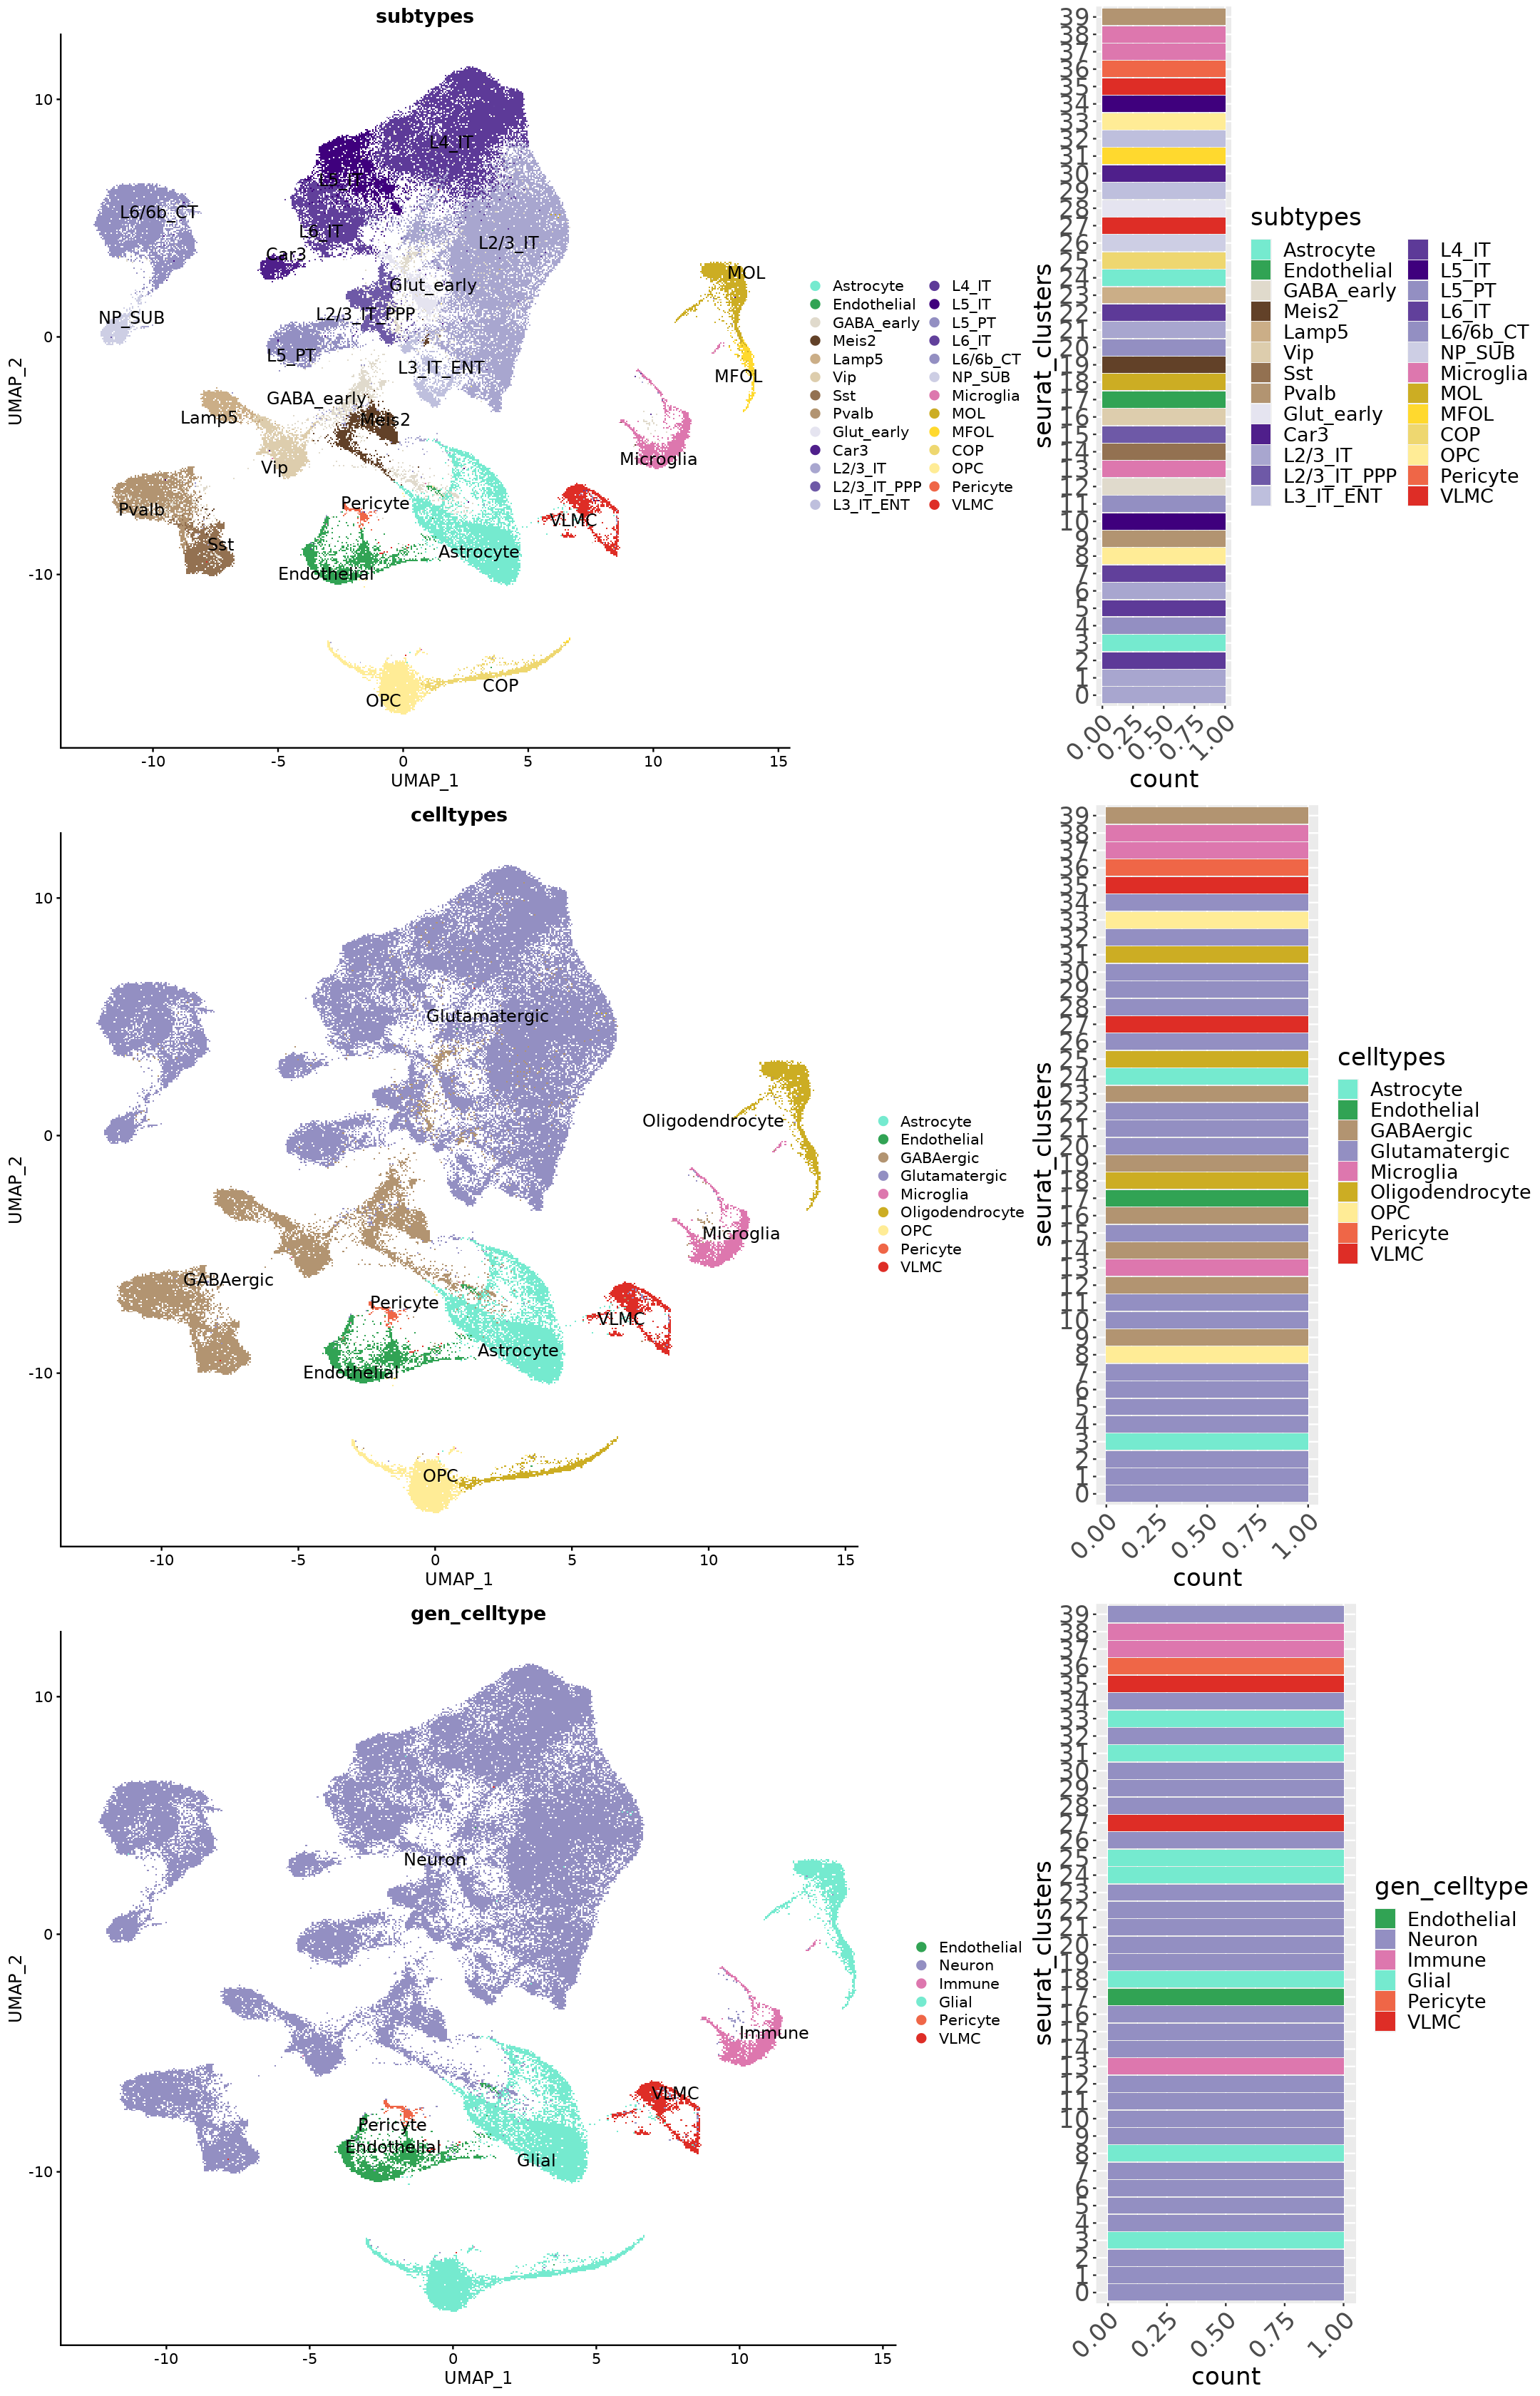

In [30]:
options(repr.plot.width = 18, repr.plot.height = 28)

umap_subtypes = DimPlot(obj, reduction = "umap", group.by = "subtypes", label = TRUE, 
                        label.size = 5, repel = TRUE) + scale_color_manual(values = subtype_cols)
cluster_subtypes = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=subtypes)) + 
    scale_fill_manual(values = subtype_cols) + geom_bar(position = "fill") + 
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20,angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) & coord_flip()


umap_celltypes = DimPlot(obj, reduction = "umap", group.by = "celltypes", label = TRUE, 
                        label.size = 5, repel = TRUE) + scale_color_manual(values = celltype_cols)
cluster_celltypes = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=celltypes)) + 
    scale_fill_manual(values = celltype_cols) + geom_bar(position = "fill") + 
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20,angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) & coord_flip()

umap_gen_celltypes = DimPlot(obj, reduction = "umap", group.by = "gen_celltype", label = TRUE, 
                        label.size = 5, repel = TRUE) + scale_color_manual(values = gen_celltype_cols)
cluster_gen_celltypes = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=gen_celltype)) + 
    scale_fill_manual(values = gen_celltype_cols) + geom_bar(position = "fill") + 
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20,angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) & coord_flip()


gridExtra::grid.arrange(
    umap_subtypes, cluster_subtypes,
    umap_celltypes, cluster_celltypes,
    umap_gen_celltypes, cluster_gen_celltypes,
  widths = c(2,1),
  layout_matrix = rbind(c(1, 2),
                       c(3, 4),
                       c(5, 6)))


In [31]:
pdf(file="../../plots/annotation/UMAPs_barplots.pdf",width = 18,height=28)

gridExtra::grid.arrange(
    umap_subtypes, cluster_subtypes,
    umap_celltypes, cluster_celltypes,
    umap_gen_celltypes, cluster_gen_celltypes,
  widths = c(2,1),
  layout_matrix = rbind(c(1, 2),
                       c(3, 4),
                       c(5, 6)))

dev.off()

png 
  2

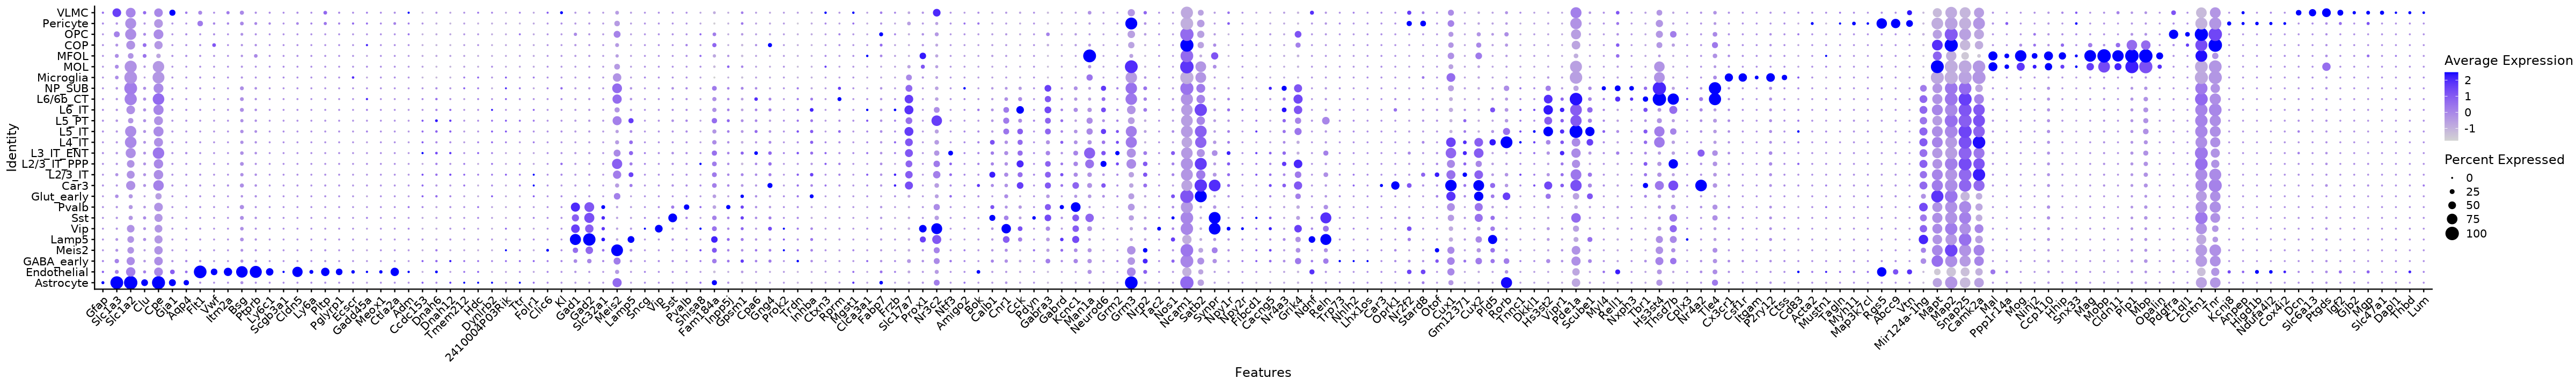

In [32]:
options(repr.plot.width = 40, repr.plot.height = 6)

Idents(obj) = obj$subtypes
p = DotPlot(obj, features =  unique(markers$Gene)) + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) 
p


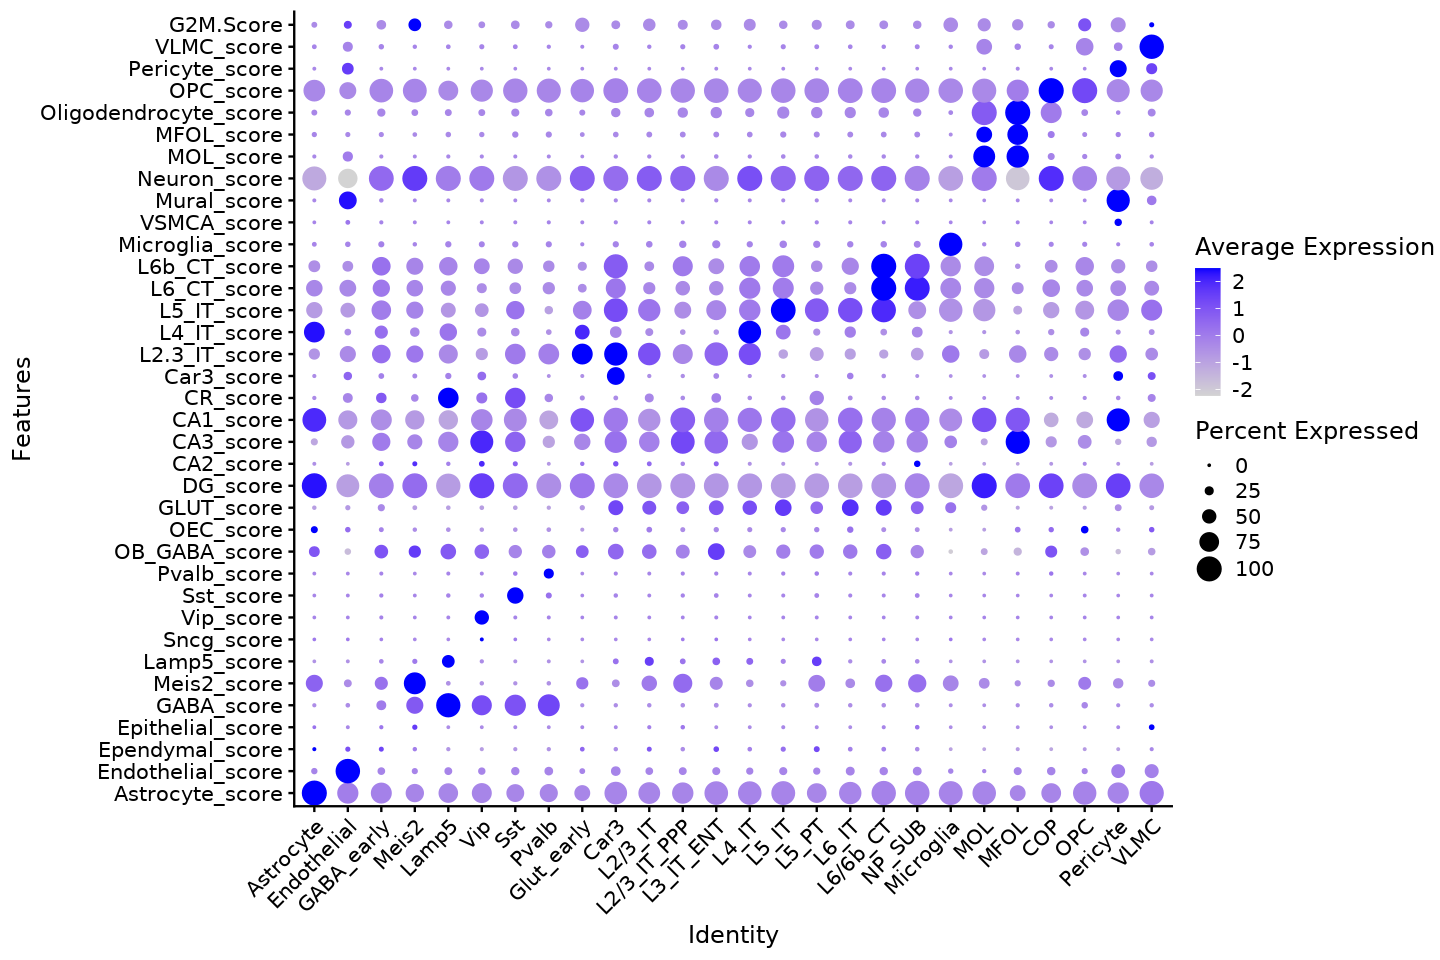

In [33]:
options(repr.plot.width = 12, repr.plot.height = 8)

p1 = DotPlot(obj, features =  c(paste0(unique(markers$Subtype),"_score"),"G2M.Score"))+ 
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) & coord_flip() 

p1


In [34]:
pdf(file="../../plots/annotation/subtypes_marker_dotplot.pdf",width = 40, height = 6)
p
dev.off()

png 
  2

In [35]:
pdf(file="../../plots/annotation/subtypes_marker_score_dotplot.pdf",width = 12, height = 8)
p1
dev.off()

png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
"ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


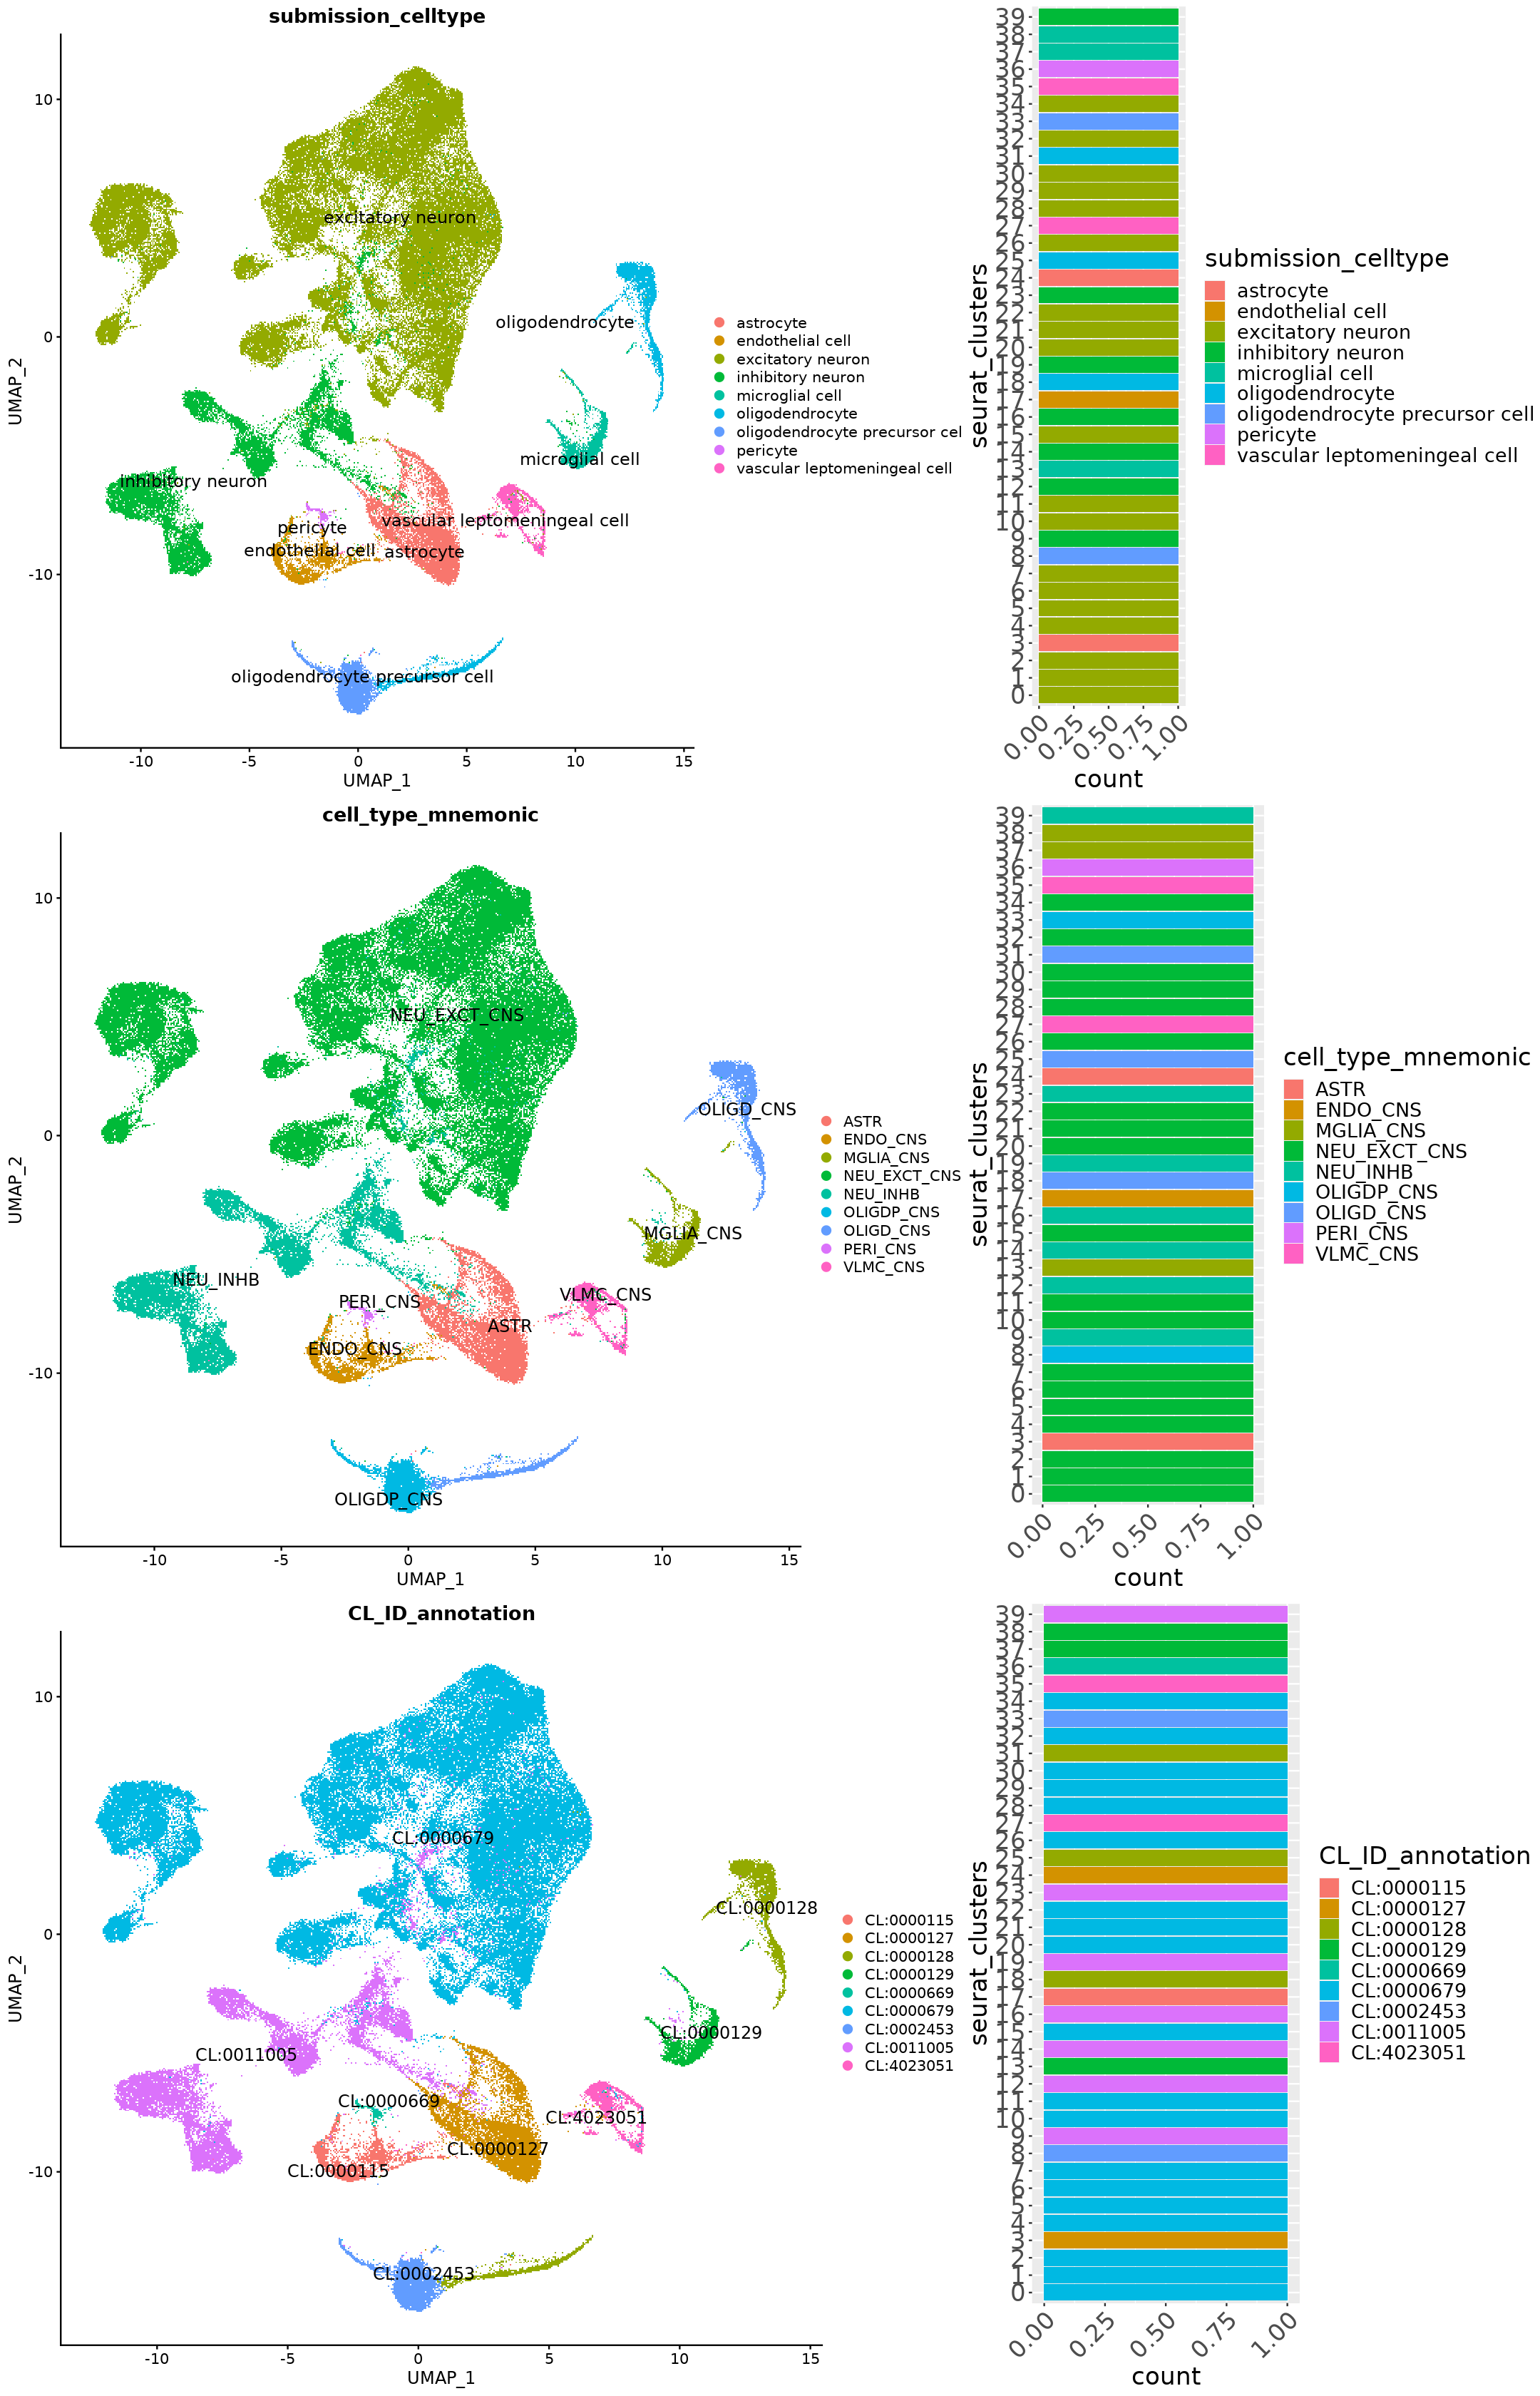

In [36]:
options(repr.plot.width = 18, repr.plot.height = 28)

umap1 = DimPlot(obj, reduction = "umap", group.by = "submission_celltype", label = TRUE, 
                        label.size = 5, repel = TRUE) #& NoLegend()
cluster1 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=submission_celltype)) + geom_bar(position = "fill") + 
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20,angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) & coord_flip()#& NoLegend()


umap2 = DimPlot(obj, reduction = "umap", group.by = "cell_type_mnemonic", label = TRUE, 
                        label.size = 5, repel = TRUE)
cluster2 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=cell_type_mnemonic)) + geom_bar(position = "fill") + 
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20,angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) & coord_flip()

umap3 = DimPlot(obj, reduction = "umap", group.by = "CL_ID_annotation", label = TRUE, 
                        label.size = 5, repel = TRUE)
cluster3 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=CL_ID_annotation)) + geom_bar(position = "fill") + 
    theme(text = element_text(size = 20), 
          axis.text.x = element_text(size = 20,angle = 45, hjust = 1), 
          axis.text.y = element_text(size = 20)) & coord_flip()


gridExtra::grid.arrange(
    umap1, cluster1,
    umap2, cluster2,
    umap3, cluster3,
  widths = c(2,1.2),
  layout_matrix = rbind(c(1, 2),
                       c(3, 4),
                       c(5, 6)))


In [37]:
pdf(file="../../plots/annotation/UMAPs_barplots_submissions.pdf",
    width = 15, height = 10)
gridExtra::grid.arrange(
    umap1, cluster1,
    umap2, cluster2,
    umap3, cluster3,
  widths = c(2,1),
  layout_matrix = rbind(c(1, 2),
                       c(3, 4),
                       c(5, 6)))
dev.off()


png 
  2

## Get ENC dataset (experiment_accession) from enc4_mouse_metadata_fixed.csv

In [38]:
expt_acc = read.csv("../../../ref/enc4_mouse_metadata_fixed.csv")
expt_acc = expt_acc[,c("sublibrary_sample","experiment_accession")]

In [39]:
seurat_metadata = obj@meta.data
seurat_metadata$experiment_accession = NULL

In [40]:
seurat_metadata = left_join(seurat_metadata,expt_acc,by="sublibrary_sample")

In [41]:
obj$rna_experiment_accession = seurat_metadata$experiment_accession

In [42]:
table(obj$rna_experiment_accession)


ENCSR037LFG ENCSR081SXM ENCSR084RQP ENCSR092RYV ENCSR118FCJ ENCSR132KMR 
       2676         289        7081          40        3565          27 
ENCSR132MEW ENCSR133XJX ENCSR134FSZ ENCSR178PKG ENCSR220GBV ENCSR224RWH 
       5117        8636          94         171          94        8067 
ENCSR248MFG ENCSR250SCW ENCSR254SLA ENCSR257BOU ENCSR302VFA ENCSR308DHB 
       3557          76        1085         155          19        1191 
ENCSR386PPF ENCSR421YXX ENCSR450IJU ENCSR467GGT ENCSR490RCS ENCSR527LIA 
        585        6310         594        8104        2771        6525 
ENCSR544MGC ENCSR611QJH ENCSR624WDN ENCSR632EIK ENCSR632SJM ENCSR659DFF 
         86        3154        9144        8605         109         343 
ENCSR720TUP ENCSR793HMA ENCSR827AOS ENCSR839BHY ENCSR883XZK ENCSR964OQW 
       9995        2195        3389        5630        2545          94 

# Save

In [ ]:
saveRDS(obj,file=paste0("../../seurat/",tissue,"_Parse_10x_integrated.rds"))


In [49]:
write.csv(obj@meta.data,file=paste0("../../seurat/",str_to_lower(tissue),"_Parse_10x_integrated_metadata.csv"))



In [50]:
obj_parse = subset(obj, subset = technology == "Parse")
saveRDS(obj_parse, file = paste0("../../seurat/",tissue,"_Parse.rds"))

obj_10x = subset(obj, subset = technology == "10x")
saveRDS(obj_10x, file = paste0("../../seurat/",tissue,"_10x.rds"))


In [51]:
write.csv(obj_parse@meta.data, file=paste0("../../seurat/",tissue,"_Parse_metadata.csv"))

write.csv(obj_10x@meta.data, file=paste0("../../seurat/",tissue,"_10x_metadata.csv"))



# Subset for regulatory genes & save matrices for input into Topyfic

In [52]:
reg_genes = read.csv("../../../ref/gene_display_table_expressed_7categories.csv")

In [53]:
table(reg_genes$gene_name %in% rownames(obj@assays$RNA@counts))


TRUE 
2701 

In [54]:
mtx_parse = obj_parse@assays$RNA@counts
mtx_parse = mtx_parse[rownames(mtx_parse) %in% reg_genes$gene_name, ]
mtx_parse = mtx_parse[match(reg_genes$gene_name, rownames(mtx_parse)), ]

mtx_10x = obj_10x@assays$RNA@counts
mtx_10x = mtx_10x[rownames(mtx_10x) %in% reg_genes$gene_name, ]
mtx_10x = mtx_10x[match(reg_genes$gene_name, rownames(mtx_10x)), ]

In [55]:
table(rownames(mtx_parse) == reg_genes$gene_name)
table(rownames(mtx_10x) == reg_genes$gene_name)


TRUE 
2701 


TRUE 
2701 

In [56]:
writeMM(mtx_parse, file=paste0("../../seurat/",tissue,"_Parse.mtx"))

writeMM(mtx_10x, file=paste0("../../seurat/",tissue,"_10x.mtx"))



NULL

NULL